In [326]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from scipy import stats
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import warnings
warnings.filterwarnings('ignore')

# **Analisis de series temprales en la atención al público**

---
---
## **1. Buscar 3 (tres) series de tiempo y exponer la problemática de interés analítico (es importante detallar cuáles fueron los motivos de elección y situar al lector en el contexto adecuado).**

---


En el presente trabajo de analizaran cuatro (4) series temporales de una oficina de atención al público:

  a.	Mensajes de WhatsApp recibidos (WAPP).

  b.	Personas atendidas de manera presencial en la oficina (TP).

  c.	Trámites a distancia iniciados (TAD).

  d.	Planes de pagos confeccionados (PP).


In [3]:
# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION2.xlsx")
# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  WAPP  TP  TAD  PP
0 2022-03-15    19  78   53   9
1 2022-03-16    12  70   26  12
2 2022-03-17    14  66   41  14
3 2022-03-18    67  50   20   9
4 2022-03-21    45  65   44   8


In [4]:
data.dtypes

FECHA    datetime64[ns]
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [5]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [6]:
data.isna().sum()

WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
---
## **2. Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias. Exponer los conceptos relacionados con la estacionariedad de la serie.**

---
### **Graficamos la serie temporal**

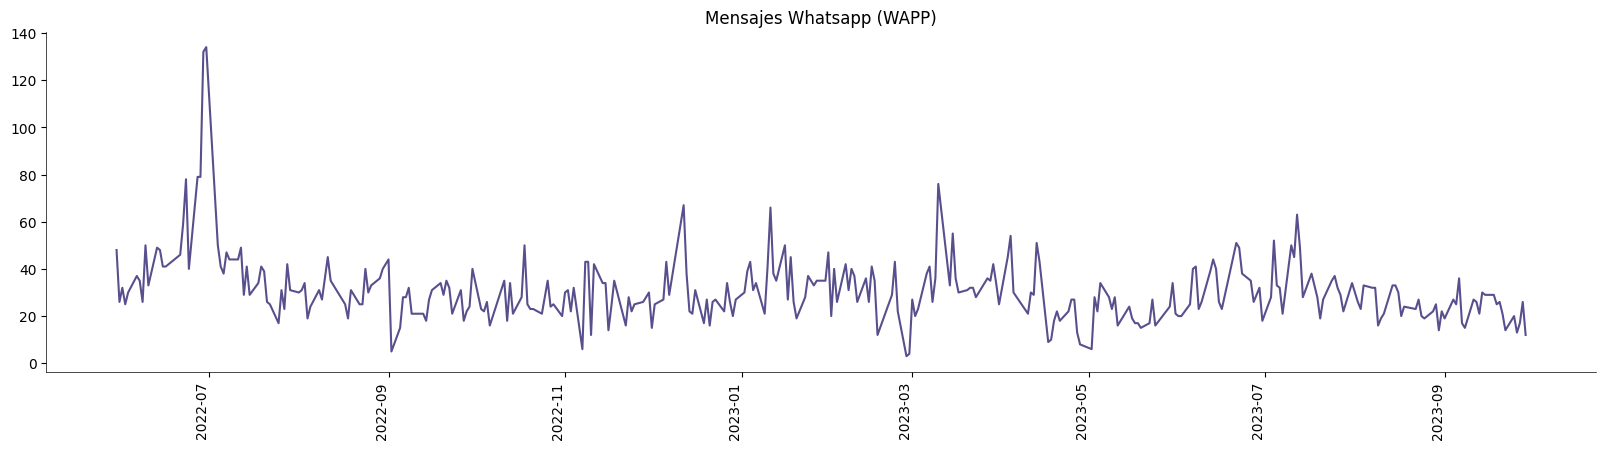

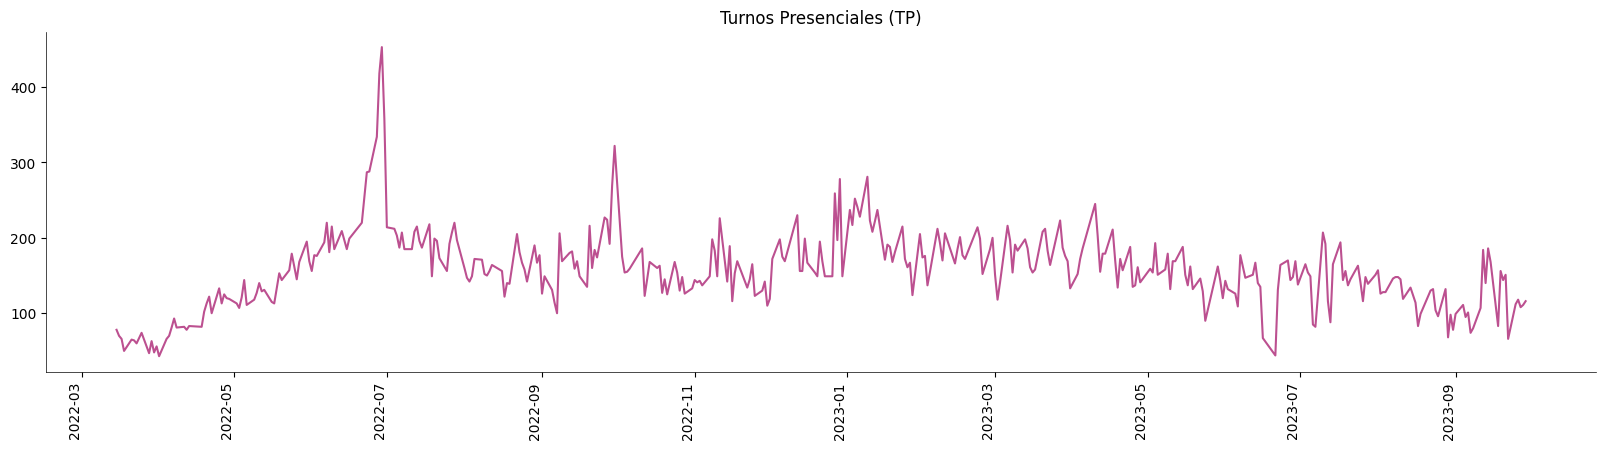

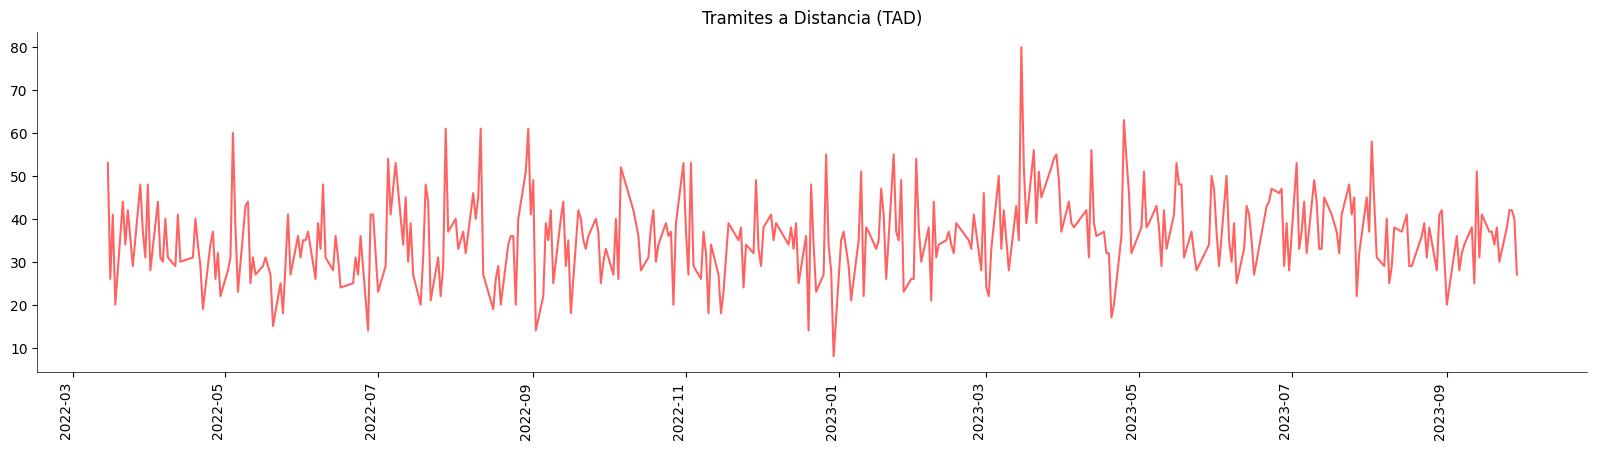

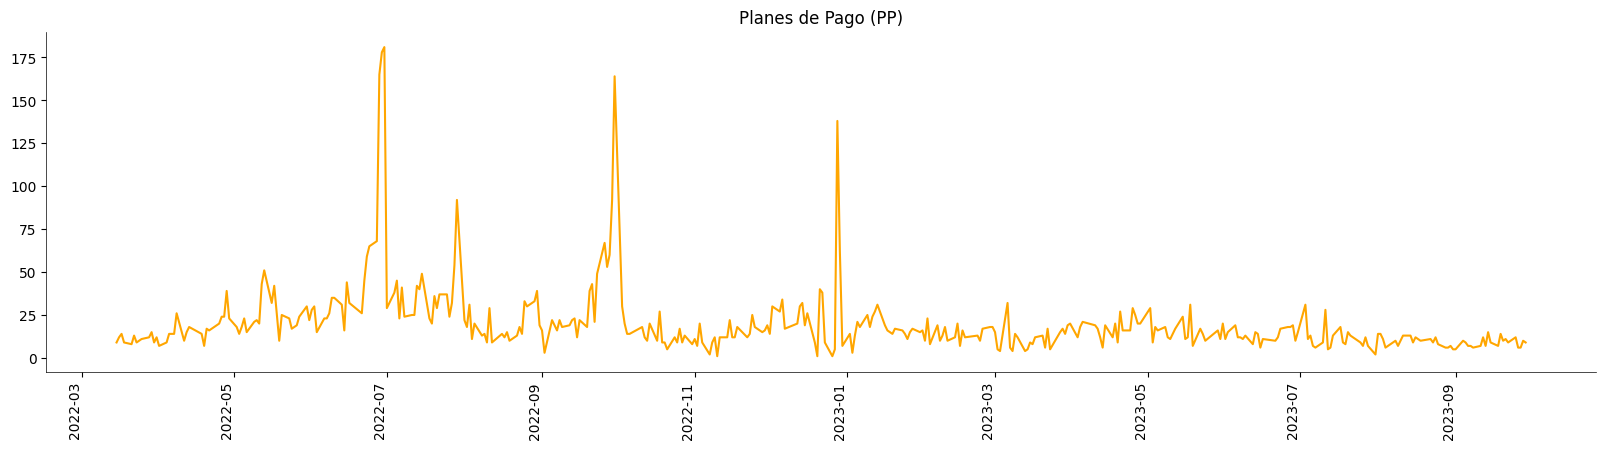

In [7]:
data["WAPP"][49:].plot(figsize=(20,5), title = "Mensajes Whatsapp (WAPP)", color='#58508d')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TP.plot(figsize=(20,5), title = "Turnos Presenciales (TP)", color='#bc5090')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TAD.plot(figsize=(20,5), title = "Tramites a Distancia (TAD)", color='#ff6361')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.PP.plot(figsize=(20,5), title = "Planes de Pago (PP)", color='#ffa600')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

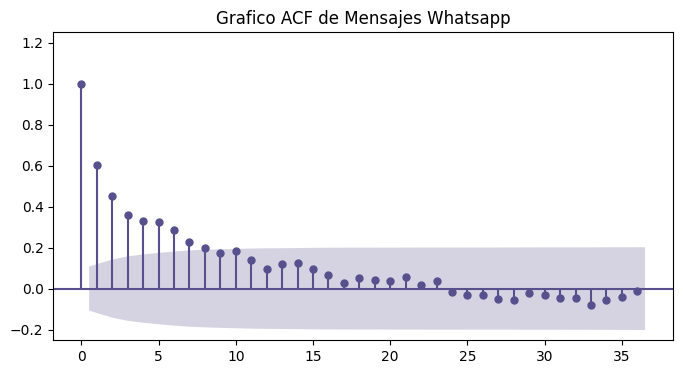

In [388]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_acf(data["WAPP"][49:], lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

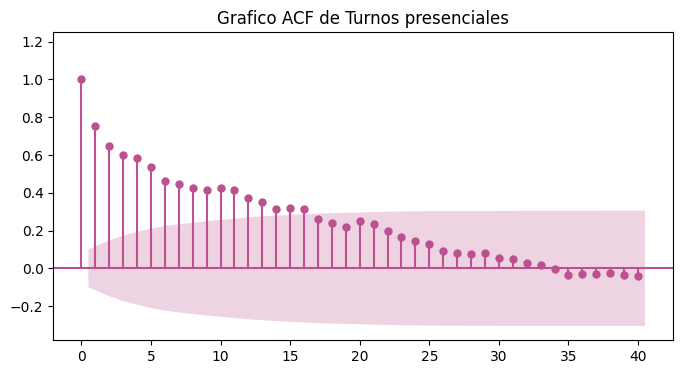

In [9]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_acf(data.TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

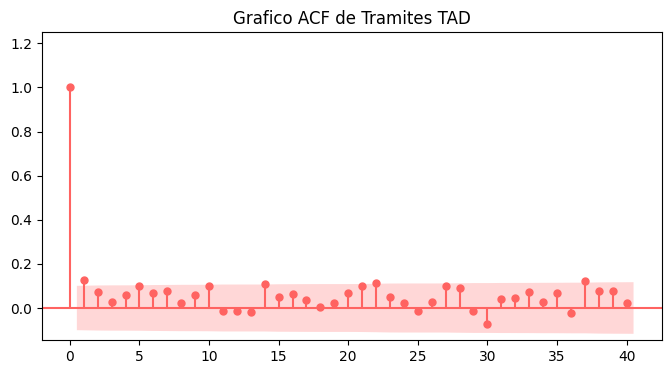

In [10]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_acf(data.TAD, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

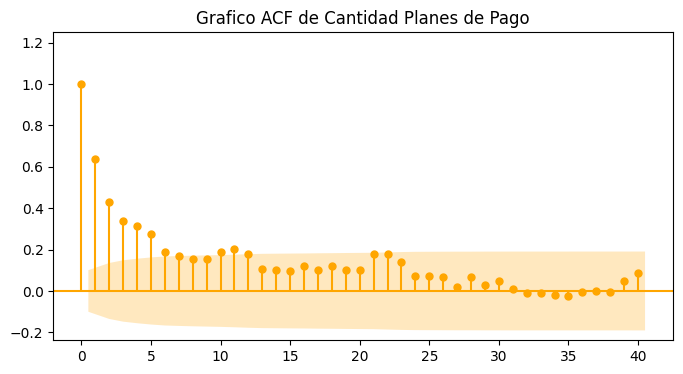

In [11]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_acf(data.PP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

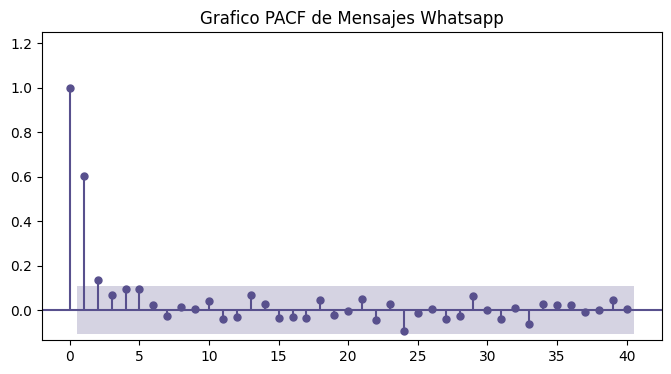

In [12]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_pacf(data["WAPP"][49:], lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

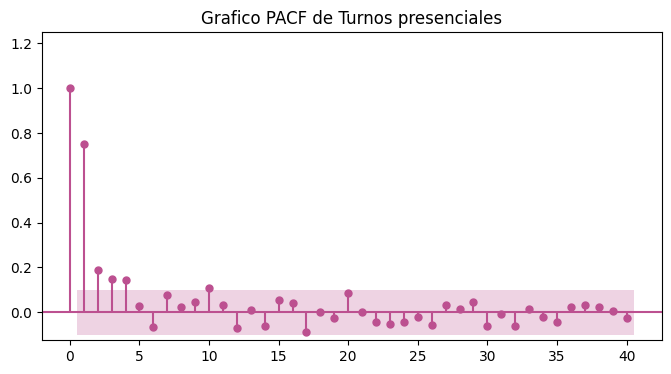

In [13]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_pacf(data.TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

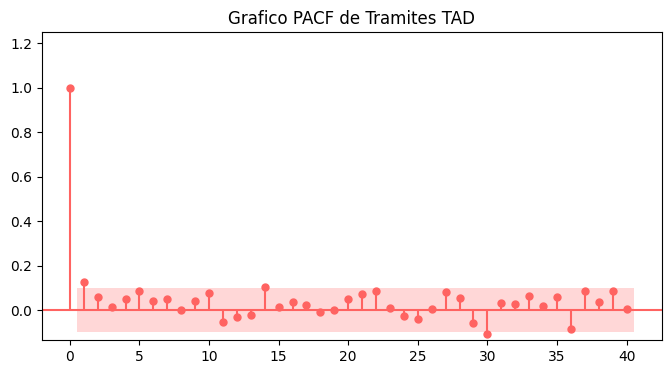

In [14]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_pacf(data.TAD, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

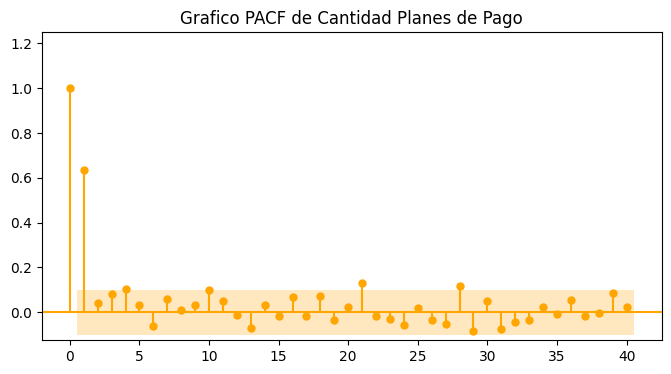

In [15]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_pacf(data.PP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
### **Representación gráfica de la Función de la Autocovarianza**

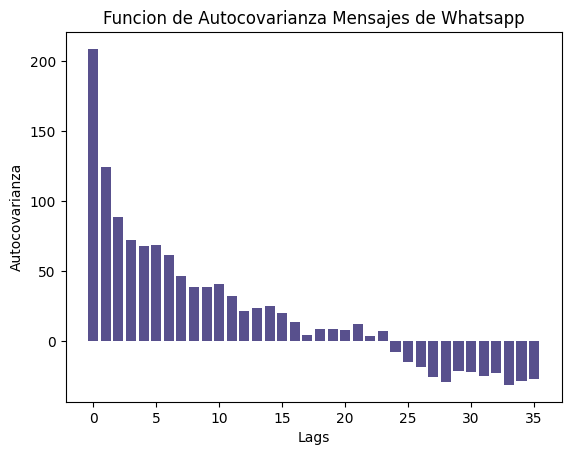

In [389]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#58508d")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Mensajes de Whatsapp')
plt.show()

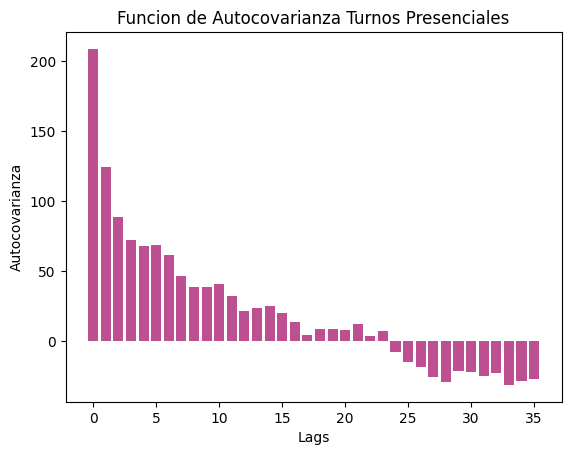

In [390]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#bc5090")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Turnos Presenciales')
plt.show()

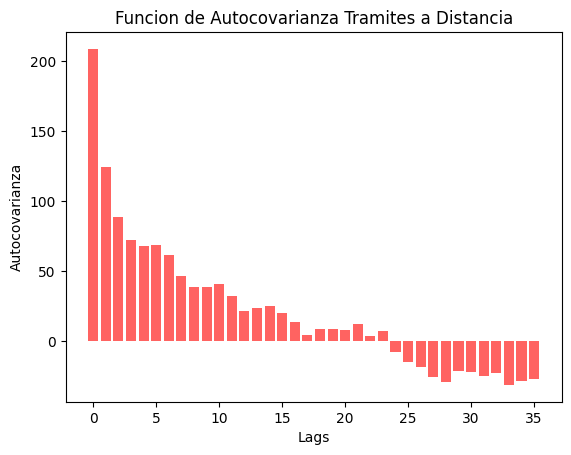

In [391]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ff6361")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Tramites a Distancia')
plt.show()

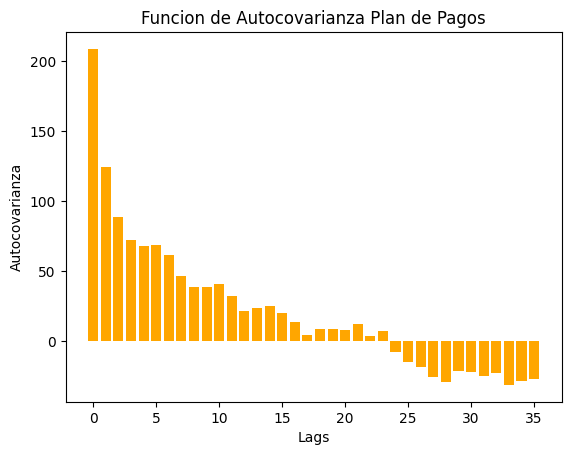

In [392]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(36)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ffa600")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Plan de Pagos')
plt.show()

---
### **Descomposición aditiva**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

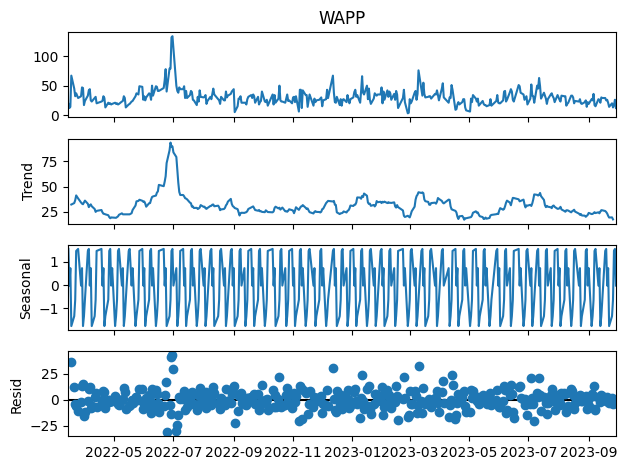

In [336]:
aditiveWP = seasonal_decompose(data.WAPP, model = "aditive", period=7)
aditiveWP.plot()

plt.show()

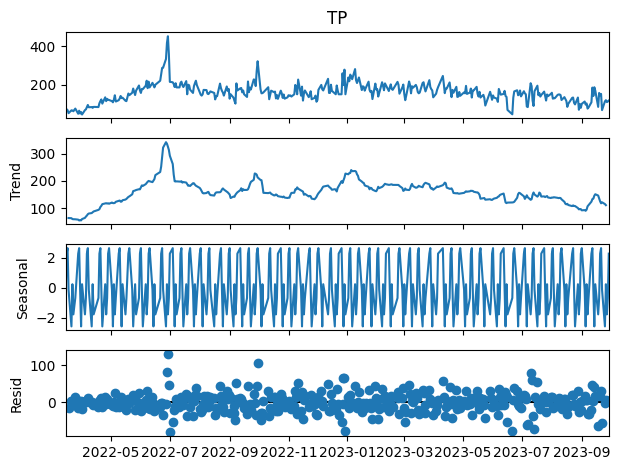

In [18]:
aditiveTP = seasonal_decompose(data.TP, model = "aditive", period=7)
aditiveTP.plot()
plt.show()

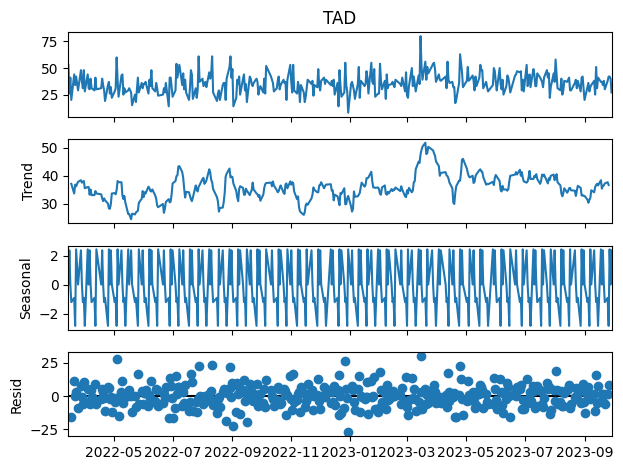

In [19]:
aditiveTAD = seasonal_decompose(data.TAD, model = "aditive", period=7)
aditiveTAD.plot()
plt.show()

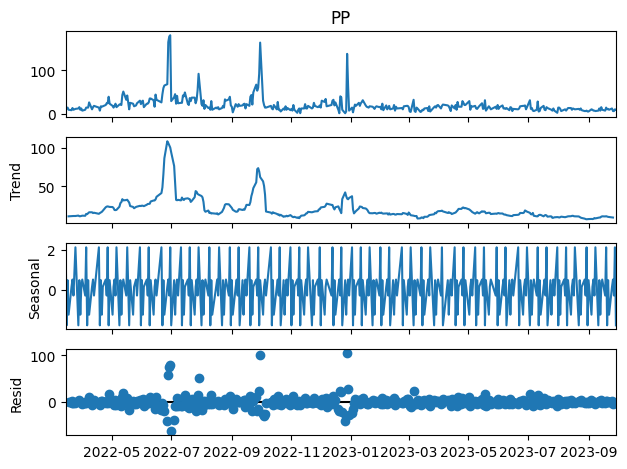

In [20]:
aditivePP = seasonal_decompose(data.PP, model = "aditive", period=7)
aditivePP.plot()
plt.show()

---
---
## **3. Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría.**

---
### **Representación gráfica de la Función de Autocorrelación**

In [21]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='MENSAJES DE WHATSAPP')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

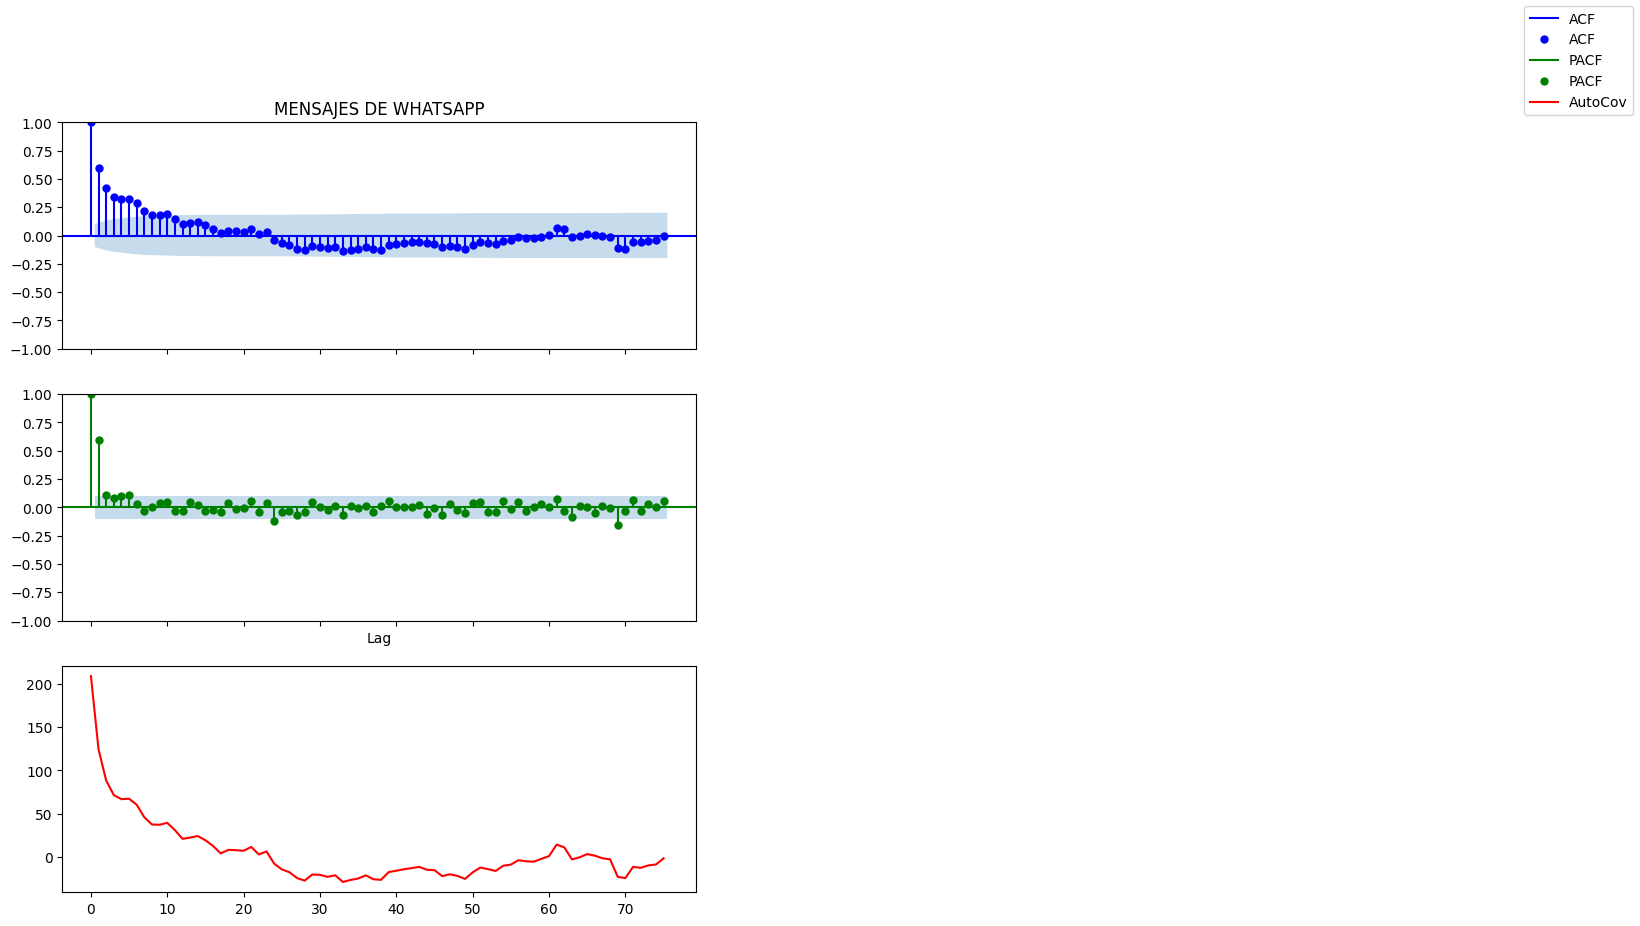

In [22]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.WAPP ,36)

In [23]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='TURNOS PRESENCIALES')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

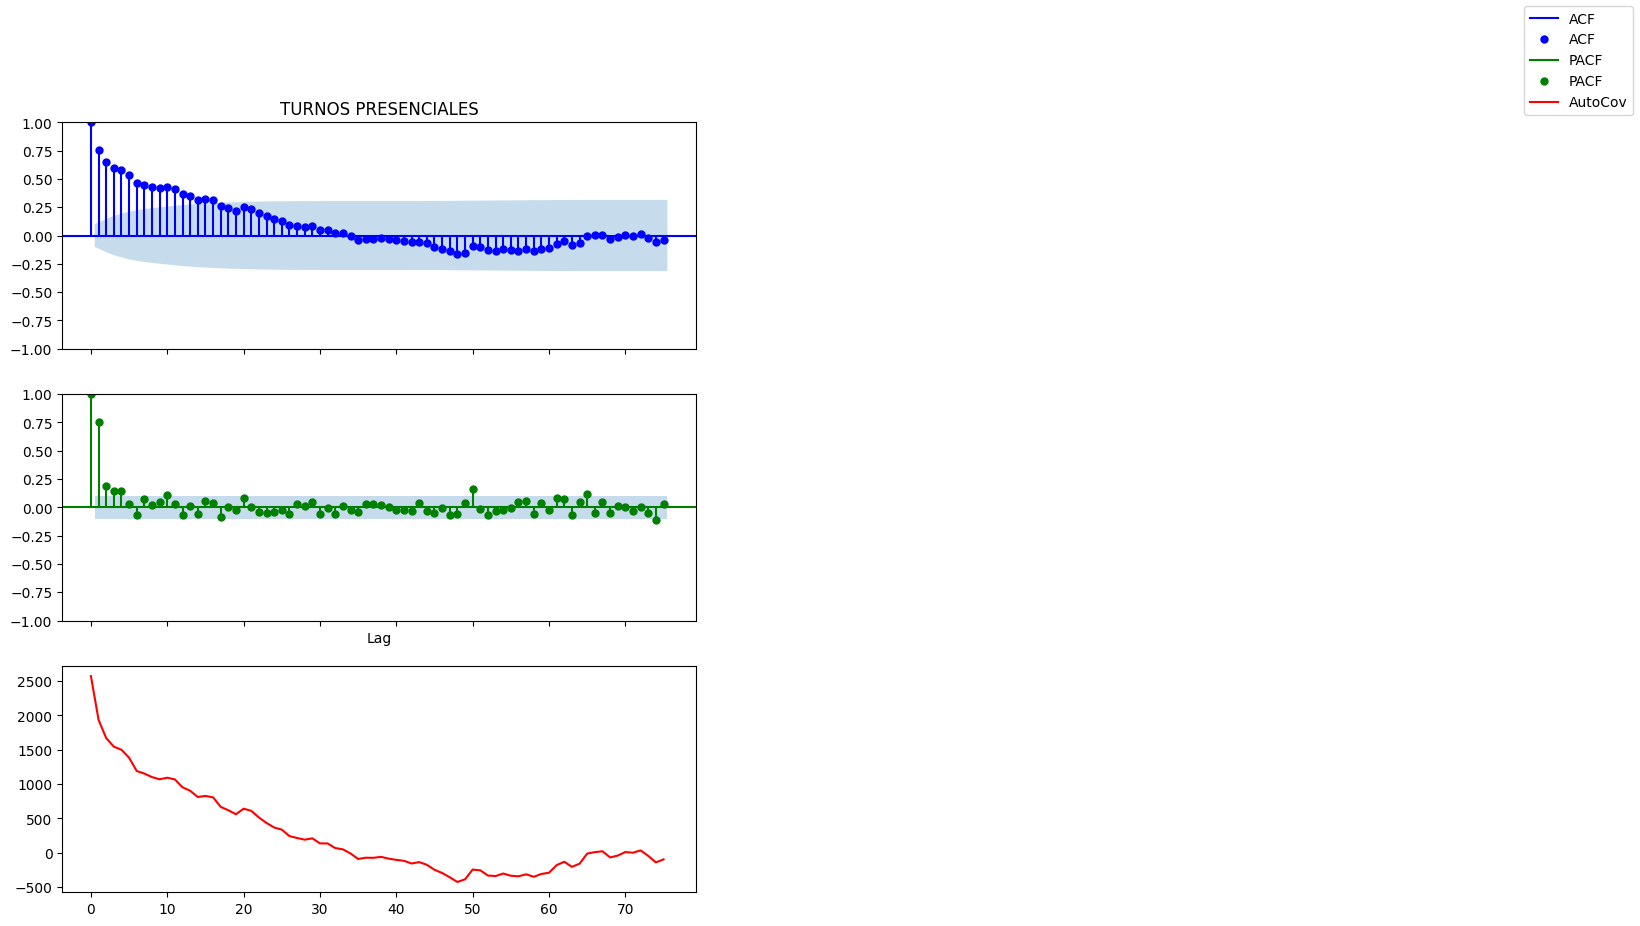

In [24]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TP ,36)

In [25]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='TRAMITES A DISTANCIA')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

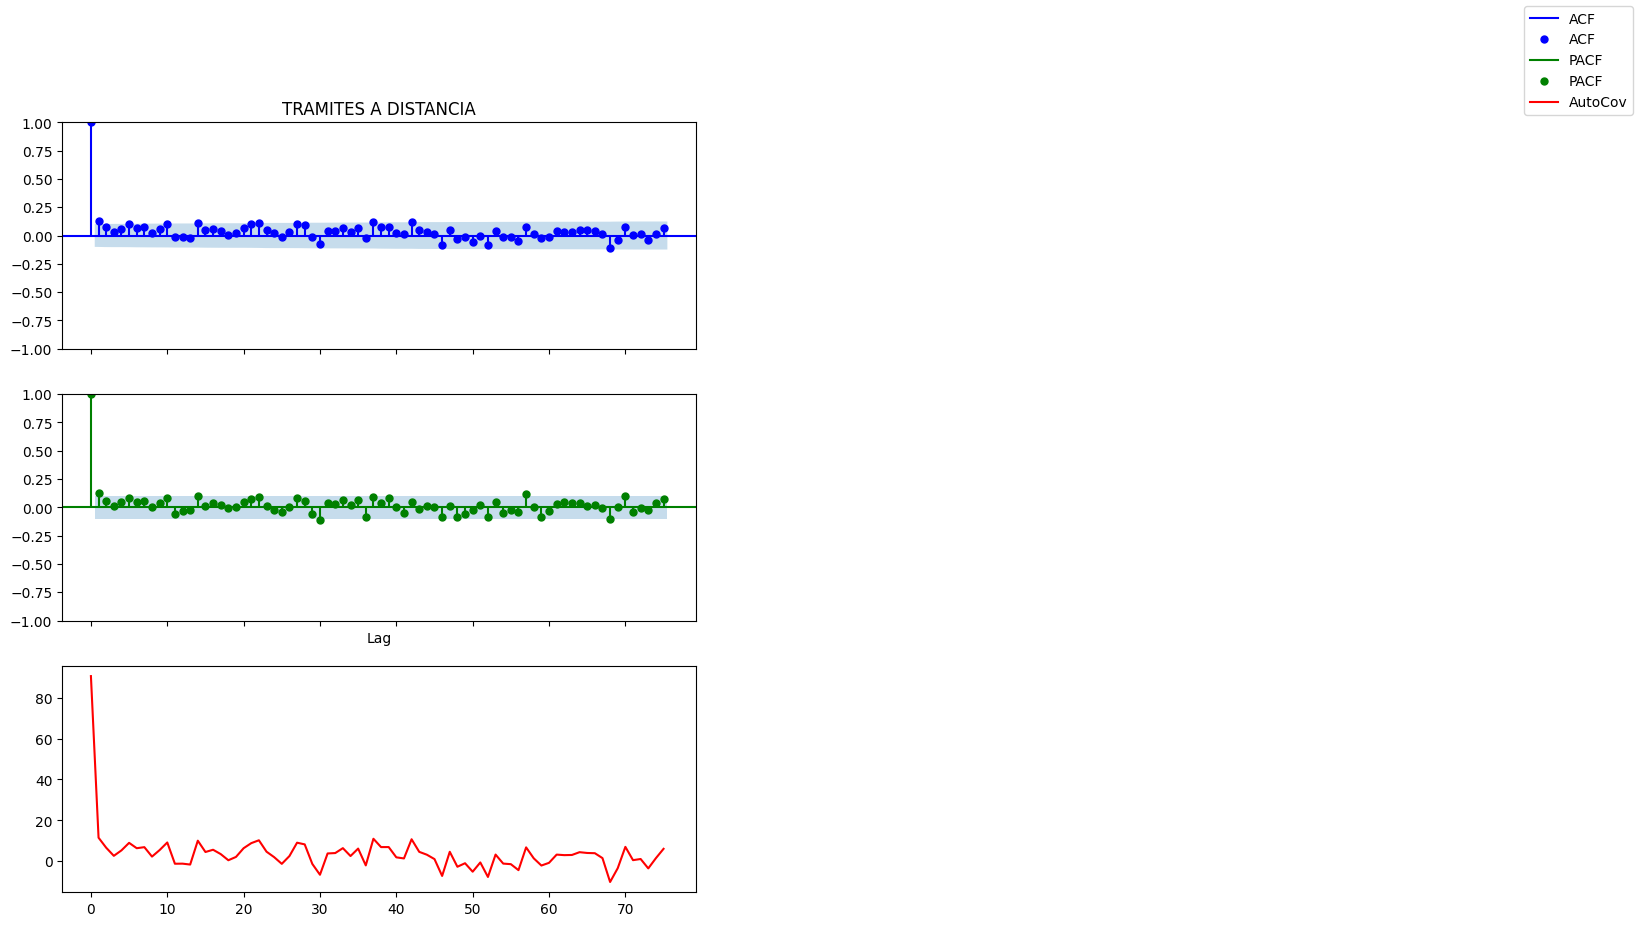

In [26]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TAD ,36)

In [27]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='PLAN DE PAGOS')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.delaxes(axes[0, 1])
  p1.delaxes(axes[1, 1])
  p1.delaxes(axes[2, 1]) 
  
  p1.legend()
  plt.show()

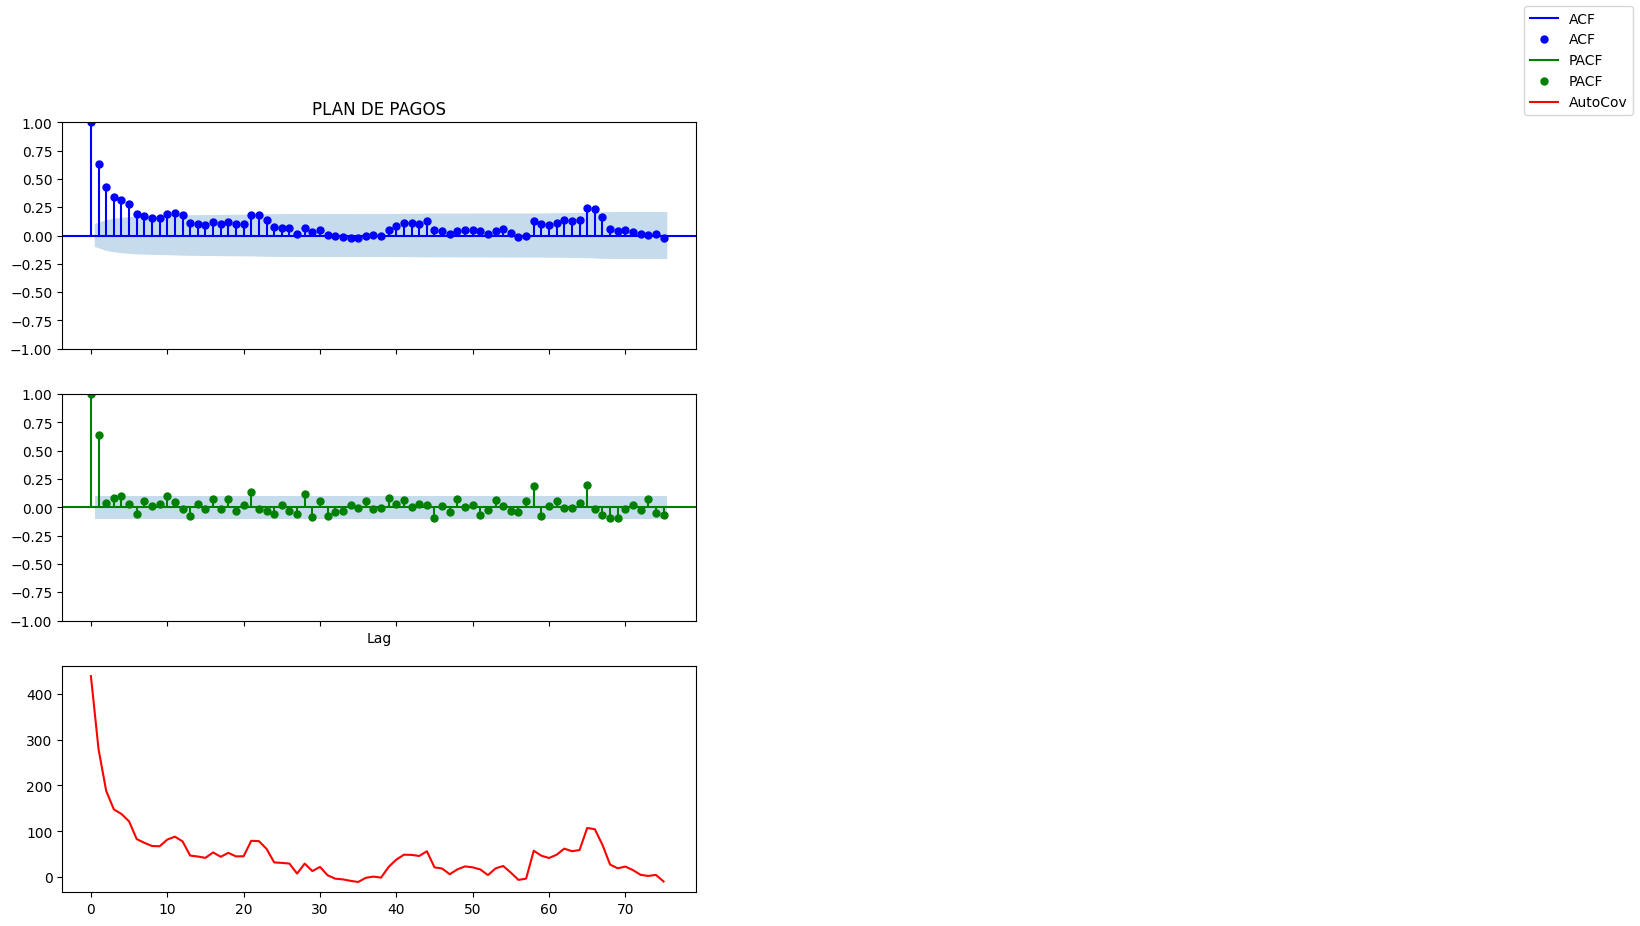

In [28]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.PP ,36)

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller y Dickey Fuller Aumentado**

In [29]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.WAPP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304825,
 7.057244224841274e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

In [30]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.WAPP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.8839454751891465,
 0.00033294838653418233,
 4,
 375,
 {'1%': -3.9831162986429627,
  '5%': -3.422262849758815,
  '10%': -3.1339732688355557},
 2788.890235439695)

In [31]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.056929963234699,
 0.0011400602877526238,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3549.28833475007)

In [32]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.142434044999488,
 0.005460042890094698,
 3,
 376,
 {'1%': -3.983050998155364,
  '5%': -3.4222313639905777,
  '10%': -3.133954779603869},
 3547.5415867306374)

In [33]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-17.138514061512463,
 7.070886466708307e-30,
 0,
 379,
 {'1%': -3.4477224095888497,
  '5%': -2.869196333125208,
  '10%': -2.5708486586002604},
 2656.1151525883392)

In [34]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TAD, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-17.56046446442062,
 0.0,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 2649.3613062332806)

In [35]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.7023596551260685,
 7.624245950438387e-07,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3061.049576137924)

In [36]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.PP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-9.751820207913624,
 7.841814374851366e-15,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 3051.496575862138)

**RESUMEN TEST DICKEY FULLER:**
Son todas series estacionarias

----
### **TEST KPSS** 

In [37]:
from statsmodels.tsa.stattools import kpss

In [38]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [39]:
kpss_test(data.WAPP) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169589
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [40]:
kpss_test(data.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.34283708625831805
p-valor: 0.1
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.30160454279699744
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [41]:
kpss_test(data.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9102855351700507
p-valor: 0.01
numero de lags: 5
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.13246296656194892
p-valor: 0.07506858044083532
numero de lags: 3
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [42]:
kpss_test(data.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9943505796524705
p-valor: 0.01
numero de lags: 9
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.09069697916612712
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [43]:
from arch.unitroot import PhillipsPerron

In [44]:
def Phillips_Perron(series, **k):

    params = {'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [337]:
Phillips_Perron(data.WAPP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.458632429535497
p-valor: 5.625490417349169e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.562162253188452
p-valor: 2.09519289511343e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [338]:
Phillips_Perron(data.TP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -8.459128653141818
p-valor: 1.5848193569306488e-13
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -8.444021867252747
p-valor: 6.747770571488781e-12
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el test Phillip Terron, la serie TURNOS PRESENCIALES es estacionaria y no hay que hacer una diferenciación

In [339]:
Phillips_Perron(data.TAD)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -18.170453374643103
p-valor: 2.447811262062307e-30
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -17.98073467352687
p-valor: 0.0
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Terron la serie TAD  es estacionaria y no hay que aplicar una diferenciación.


In [340]:
Phillips_Perron(data.PP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.264481589979654
p-valor: 4.1536427722986445e-18
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.331323435070525
p-valor: 4.692785152690958e-16
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**
Todas las series son estacionarias según este test.

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [342]:
import pandas as pd
datatest = [
    ["Dickey Fuller", "si", "si", "si", "si"],
    ["Dickey Fuller Aumentado", "si", "si", "si", "si"],
    ["KPSS c", "si", "si", "no", "no"],
    ["KPSS t", "si", "no", "si", "si"],    
    ["Phillip Perron c", "si", "si", "si", "si"],
    ["Phillip Perron ct", "si", "si", "si", "si"]
]

# Encabezados de las columnas
headers = ["Test", "wapp", "tp", "tad", "pp"]

# Crear un DataFrame
df = pd.DataFrame(datatest, columns=headers)

# Mostrar el DataFrame
print(df)


                      Test wapp  tp tad  pp
0            Dickey Fuller   si  si  si  si
1  Dickey Fuller Aumentado   si  si  si  si
2                   KPSS c   si  si  no  no
3                   KPSS t   si  no  si  si
4         Phillip Perron c   si  si  si  si
5        Phillip Perron ct   si  si  si  si


Considerando el test de Dickey-Fuller Aumentado podemos determinar que las series son estacionarias.

---
### **HACER DIFERENCIACION**

In [343]:
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

*WAPP*

In [51]:
# DIFERENCIACION DE LA VARIABLE WHATSAPP (WAPP)
data_diff_WAPP=data.WAPP.copy()
data_diff_WAPP=data_diff_WAPP.diff(periods = 1)
data_diff_WAPP.drop(['2022-03-15'], inplace=True)

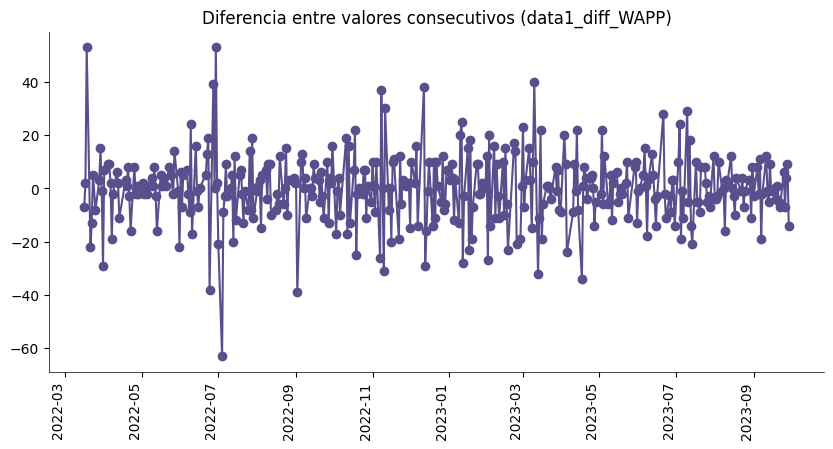

In [52]:
# Traza la Serie data1_diff_WAPP
data_diff_WAPP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#58508d')
# Etiquetas y título del gráfico
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_WAPP)')
# Muestra el gráfico
plt.show()

In [344]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_WAPP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-12.916732705106464,
 1.5071171349421608e-23,
 4,
 374,
 {'1%': -2.5717440049758356,
  '5%': -1.9417416419975033,
  '10%': -1.616128757626885},
 2798.8729176696143)

*TP*

In [53]:
# DIFERENCIACION DE LA VARIABLE TURNOS PRESENCIALES (TP)
data_diff_TP=data.TP.copy()
data_diff_TP=data_diff_TP.diff(periods = 1)
data_diff_TP.drop(['2022-03-15'], inplace=True)

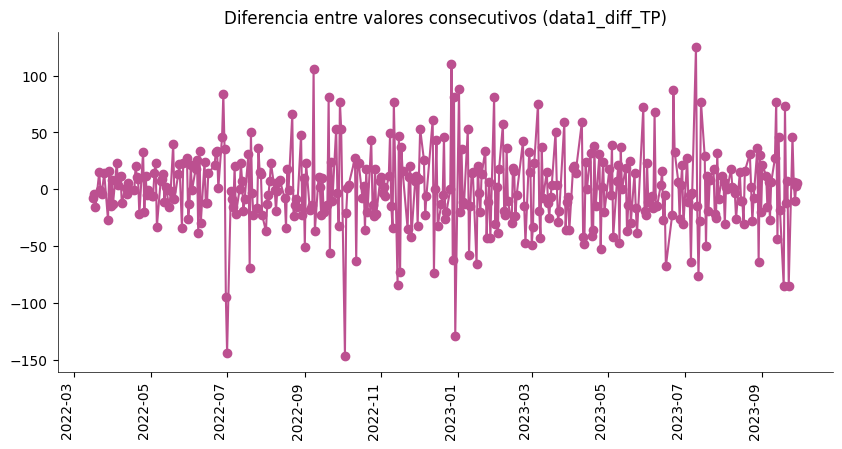

In [54]:
# Traza la Serie data1_diff_TP
data_diff_TP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TP)')
# Muestra el gráfico
plt.show()


In [345]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.736394275741358,
 3.817258854824125e-17,
 8,
 370,
 {'1%': -2.571809196493791,
  '5%': -1.9417499095216473,
  '10%': -1.6161214861113853},
 3548.505644951998)

*TAD*

In [55]:
# DIFERENCIACION DE LA VARIABLE TRÁMITES (TAD)
data_diff_TAD=data.TAD.copy()
data_diff_TAD=data_diff_TAD.diff(periods = 1)
data_diff_TAD.drop(['2022-03-15'], inplace=True)

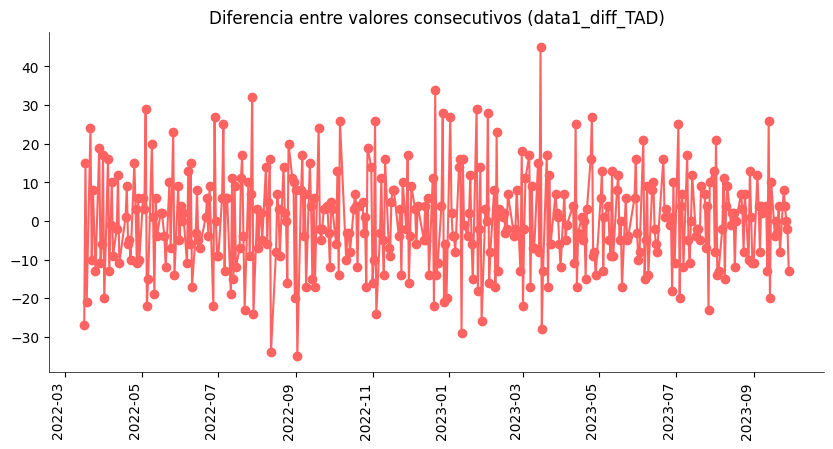

In [56]:
# Traza la Serie data1_diff_TAD
data_diff_TAD.plot(figsize=(10, 5), marker='o', linestyle='-', color='#ff6361')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TAD)')
# Muestra el gráfico
plt.show()

In [346]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TAD, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-8.801149383373234,
 4.873461286770716e-15,
 12,
 366,
 {'1%': -2.5718758192242226,
  '5%': -1.9417583631286157,
  '10%': -1.616114059985768},
 2670.1647448552244)

*PLAN DE PAGOS*

In [57]:
# DIFERENCIACION DE LA VARIABLE PLANES DE PAGO (PP)
data_diff_PP=data.PP.copy()
data_diff_PP=data_diff_PP.diff(periods = 1)
data_diff_PP.drop(['2022-03-15'], inplace=True)

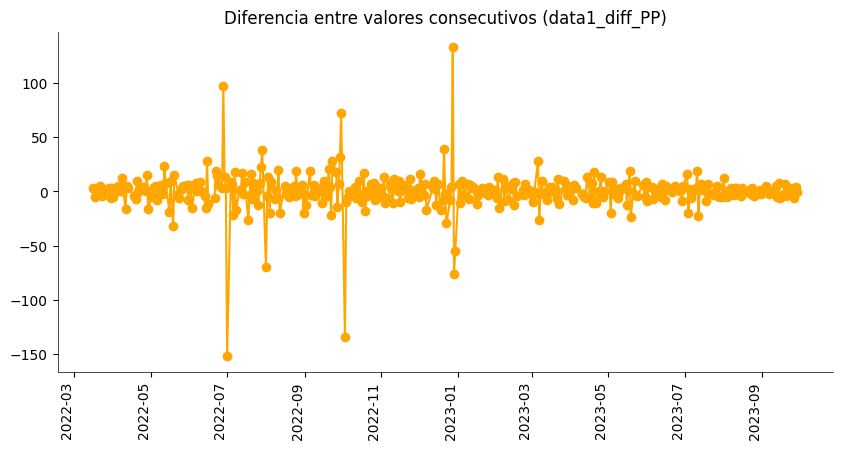

In [58]:
# Traza la Serie data1_diff_PP
data_diff_PP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#ffa600')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_PP)')
# Muestra el gráfico
plt.show()

In [347]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_PP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.73092962734765,
 3.925462475023311e-17,
 9,
 369,
 {'1%': -2.5718257161742346,
  '5%': -1.9417520052351545,
  '10%': -1.6161196442657781},
 3067.982374319884)

---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**DIFF WAPP**

In [59]:
auto_arima(data_diff_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3022.553, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2992.947, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2962.685, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3020.554, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2961.927, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2962.584, Time=0.16 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2964.477, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2940.636, Time=0.09 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2942.310, Time=0.25 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2942.326, Time=0.31 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2944.284, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2991.729, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2942.619, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2942.618, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept

 ARIMA(1,0,1)(1,0,1)[7]             : AIC=2942.322, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2959.930, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=2989.729, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[7]             : AIC=2940.659, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[7]             : AIC=2940.658, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[7]             : AIC=2942.327, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[7]             : AIC=2973.729, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[7]             : AIC=2942.661, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[7]          
Total fit time: 4.574 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Sat, 11 Nov 2023   AIC                           2938.676
Time:                        22:46:06   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.000     123.185     144.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               391.26
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [348]:
modelo_sarima_WAPP = SARIMAX(data_diff_WAPP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_WAPP = modelo_sarima_WAPP.fit()
print(modelo_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Sat, 11 Nov 2023   AIC                           2938.676
Time:                        23:36:08   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.0

**DIFF TP**

In [61]:
auto_arima(data_diff_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3783.506, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3752.239, Time=0.13 sec


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3723.049, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3781.509, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3723.451, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=3723.487, Time=0.67 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3723.394, Time=0.25 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=3724.293, Time=0.64 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3785.424, Time=0.06 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=3711.955, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=3710.268, Time=0.12 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=3712.011, Time=0.24 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=3750.563, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=3712.181, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=3712.147, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1851.171
Date:                Sat, 11 Nov 2023   AIC                           3708.342
Time:                        22:46:12   BIC                           3720.154
Sample:                             0   HQIC                          3713.030
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9381     54.378     18.793      0.000     915.359    1128.517
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                61.87
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.38
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [349]:
modelo_sarima_TP = SARIMAX(data_diff_TP, order=(2,0,2), seasonal_order=(0,0,0,7))
modelo_sarima_TP = modelo_sarima_TP.fit()
print(modelo_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  379
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1851.144
Date:                Sat, 11 Nov 2023   AIC                           3712.287
Time:                        23:37:34   BIC                           3731.975
Sample:                             0   HQIC                          3720.100
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0186      3.320     -0.006      0.996      -6.526       6.489
ar.L2          0.1659      1.235      0.134      0.893      -2.255       2.587
ma.L1         -0.4250      3.327     -0.128      0.8

**DIFF TAD**

In [350]:
auto_arima(data_diff_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2997.127, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2908.685, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2785.271, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2995.138, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2783.401, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2785.254, Time=0.12 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2783.765, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2783.426, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2783.506, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2906.721, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2785.378, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2781.427, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2783.285, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2783.302, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Sat, 11 Nov 2023   AIC                           2781.427
Time:                        23:38:44   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                41.93
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [351]:
modelo_sarima_TAD = SARIMAX(data_diff_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_TAD = modelo_sarima_TAD.fit()
print(modelo_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Sat, 11 Nov 2023   AIC                           2781.427
Time:                        23:38:51   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
Ljung-Box (L1) (Q):                   2.02   Jarque-

**DIFF PP**

In [65]:
auto_arima(data_diff_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3265.837, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3251.428, Time=0.16 sec


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3232.818, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3263.837, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3232.725, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3232.975, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3234.757, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=3205.548, Time=0.08 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=3205.973, Time=0.15 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=3205.912, Time=0.18 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=3207.907, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=3197.327, Time=0.11 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=3199.148, Time=0.19 sec
 ARIMA(0,0,3)(0,0,1)[7] intercept   : AIC=3199.138, Time=0.27 sec
 ARIMA(0,0,3)(1,0,1)[7] intercept   : AIC=3201.120, Time=0.68 sec
 ARIMA(1,0,3)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Sat, 11 Nov 2023   AIC                           3189.414
Time:                        22:46:26   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.000     248.926     269.509
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9745.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [352]:
modelo_sarima_PP = SARIMAX(data_diff_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_PP = modelo_sarima_PP.fit()
print(modelo_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Sat, 11 Nov 2023   AIC                           3189.414
Time:                        23:40:04   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.0

**WHATSAPP (WAPP)**

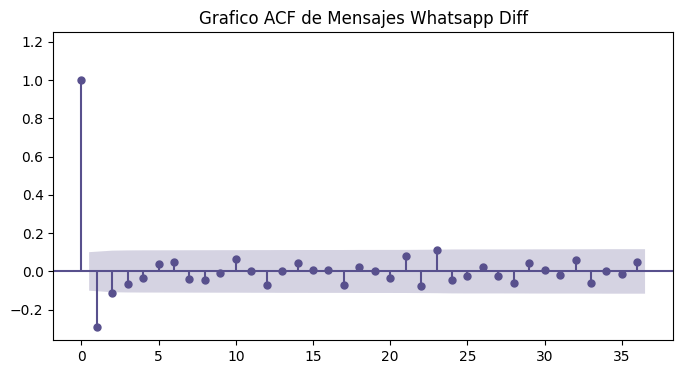

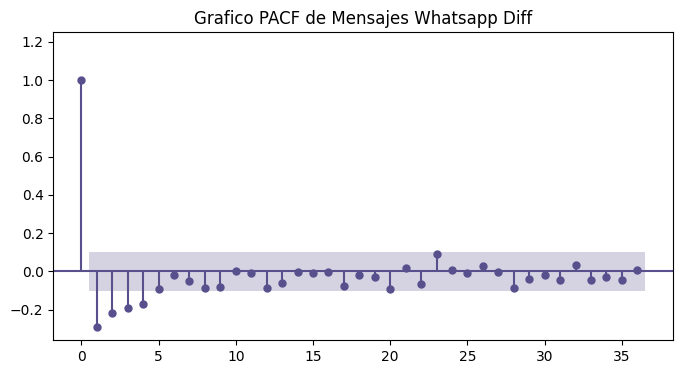

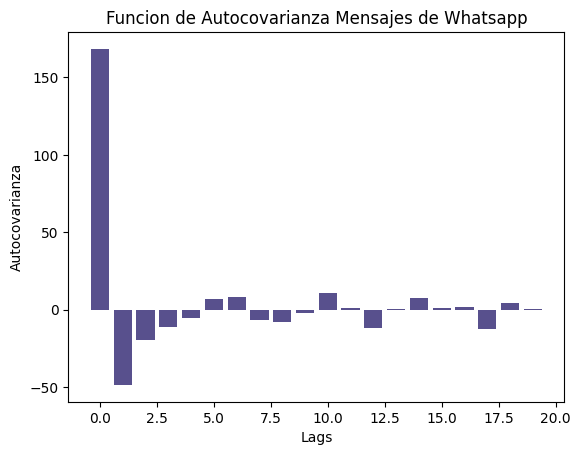

In [355]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_acf(data_diff_WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Mensajes Whatsapp Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_pacf(data_diff_WAPP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Mensajes Whatsapp Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_WAPP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#58508d")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Mensajes de Whatsapp Diff')
plt.show()


**TURNOS PRESENCIALES (TP)**

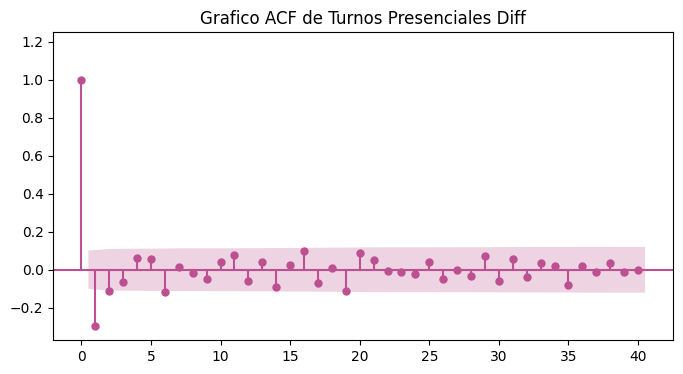

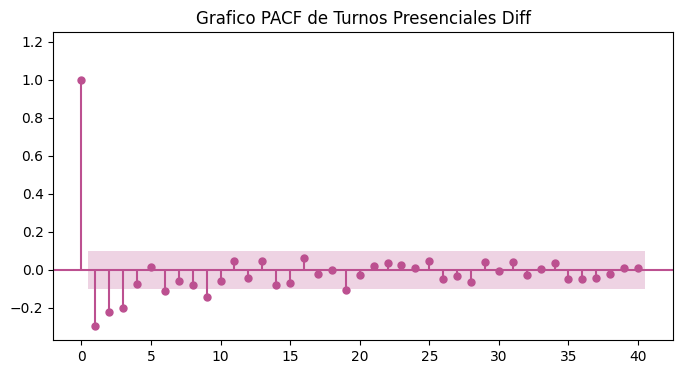

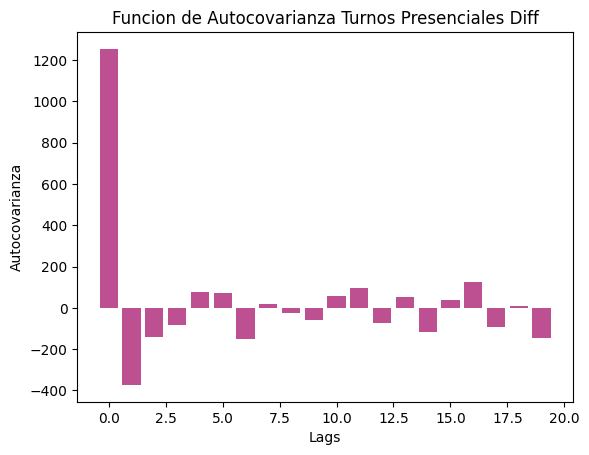

In [359]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Turnos Presenciales Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Turnos Presenciales Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)


plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TP

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#bc5090")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Turnos Presenciales Diff')
plt.show()



**TRAMITES A DISTANCIA (TAD)**

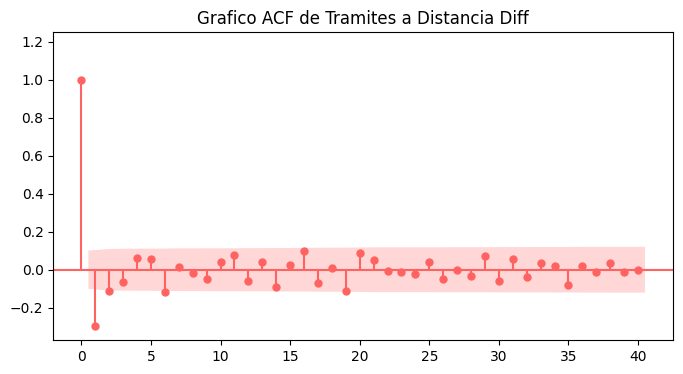

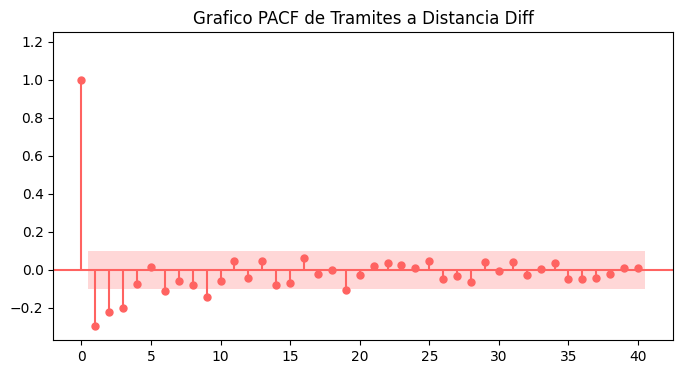

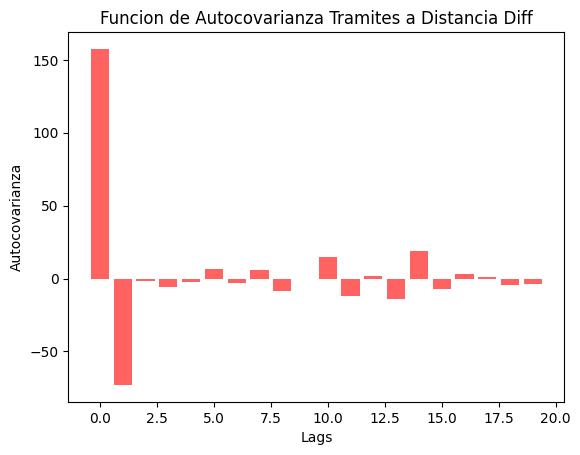

In [362]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Tramites a Distancia Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Tramites a Distancia Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TAD

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ff6361")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Tramites a Distancia Diff')
plt.show()


**PLAN DE PAGOS (PP)**

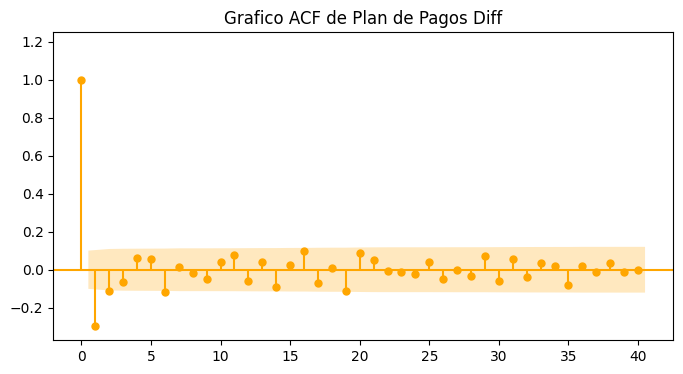

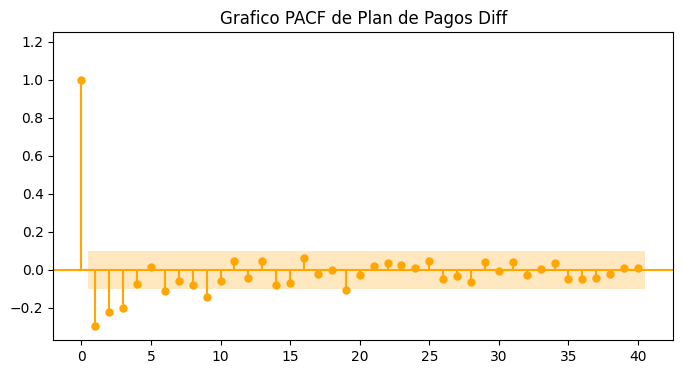

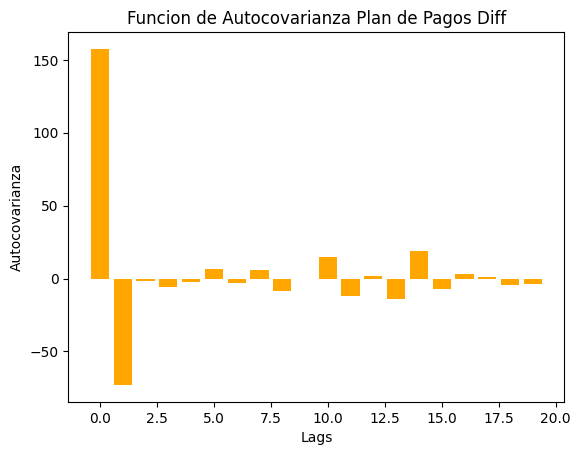

In [364]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_acf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Plan de Pagos Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_pacf(data_diff_TP, lags=36, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Plan de Pagos Diff", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_diff_TAD

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars, color="#ffa600")
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza Plan de Pagos Diff')
plt.show()

---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

**WHATSAPP**

In [71]:
# Seleccionamos el primer 75% para train
train_WAPP = data_diff_WAPP.iloc[:round(len(data_diff_WAPP)*.75)]
# Seleccionamos el 25% restante para test
test_WAPP = data_diff_WAPP.iloc[round(len(data_diff_WAPP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_WAPP, test_WAPP)

FECHA
2022-03-16    -7.0
2022-03-17     2.0
2022-03-18    53.0
2022-03-21   -22.0
2022-03-22   -13.0
              ... 
2023-05-08    -6.0
2023-05-09    -5.0
2023-05-10     5.0
2023-05-11   -12.0
2023-05-12     2.0
Name: WAPP, Length: 284, dtype: float64 FECHA
2023-05-15     6.0
2023-05-16    -5.0
2023-05-17    -2.0
2023-05-18     0.0
2023-05-19    -2.0
              ... 
2023-09-25     6.0
2023-09-26    -7.0
2023-09-27     4.0
2023-09-28     9.0
2023-09-29   -14.0
Name: WAPP, Length: 95, dtype: float64


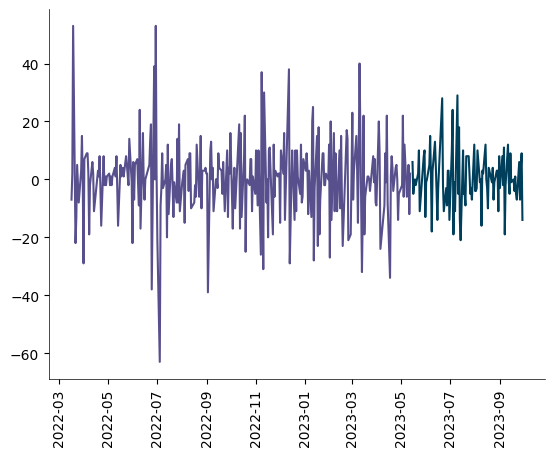

In [72]:
plt.plot(train_WAPP, color="#58508d")
plt.plot(test_WAPP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [73]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2306.528, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2284.329, Time=0.18 sec


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2264.579, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2304.528, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2262.730, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2264.579, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2266.579, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2248.614, Time=0.09 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2250.604, Time=0.18 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2250.604, Time=0.19 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2251.942, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2282.329, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2250.220, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2252.199, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=2272.453, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=2248.189, Time=0.34 sec
 ARIMA(2,0,2)(1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1118.094
Date:                Sat, 11 Nov 2023   AIC                           2248.189
Time:                        22:46:37   BIC                           2270.083
Sample:                             0   HQIC                          2256.966
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0011      0.005     -0.201      0.841      -0.011       0.009
ar.L1          1.2833      0.221      5.811      0.000       0.850       1.716
ar.L2         -0.3296      0.135     -2.439      0.015      -0.595      -0.065
ma.L1         -1.7572      0.220     -8.002      0.000      -2.188      -1.327
ma.L2          0.7612      0.205      3.719      0.000       0.360       1.162
sigma2       152.9977      8.299     18.436      0.000     136.733     169.263
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               289.98
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.96
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [365]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1117.160
Date:                Sat, 11 Nov 2023   AIC                           2244.320
Time:                        23:51:02   BIC                           2262.565
Sample:                             0   HQIC                          2251.635
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2316      0.219      5.629      0.000       0.803       1.660
ar.L2         -0.2964      0.145     -2.050      0.040      -0.580      -0.013
ma.L1         -1.7257      4.050     -0.426      0.6

In [366]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [76]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [77]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(95)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()

In [79]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index

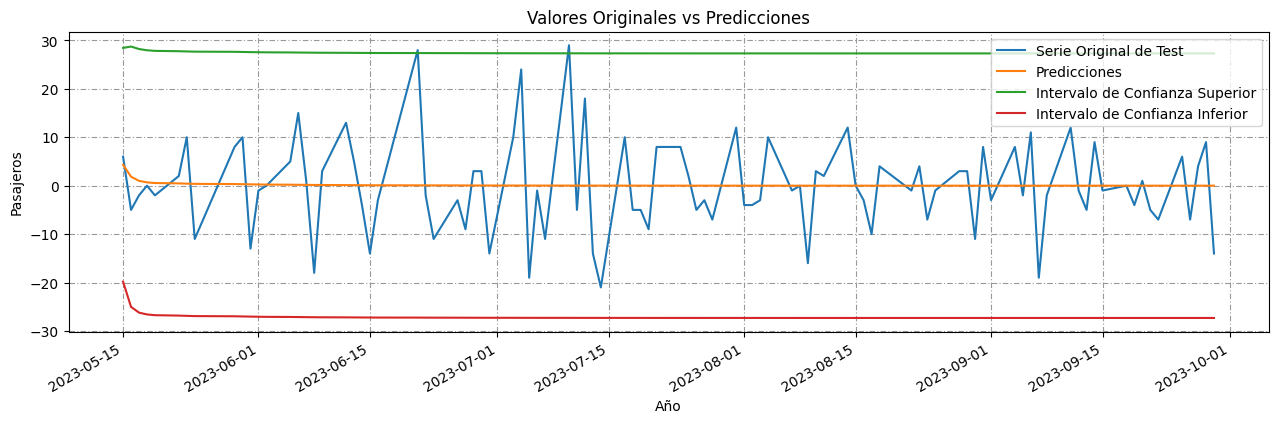

In [80]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)

In [367]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [368]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)

MSE: 90.90918099811735
MAE: 7.252809666546017
RMSE: 9.534630616763156
MAPE: nan


**TURNOS PRESENCIALES**

In [83]:
# Seleccionamos el primer 75% para train
train_TP = data_diff_TP.iloc[:round(len(data_diff_TP)*.75)]
# Seleccionamos el 25% restante para test
test_TP = data_diff_TP.iloc[round(len(data_diff_TP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TP, test_TP)

FECHA
2022-03-16    -8.0
2022-03-17    -4.0
2022-03-18   -16.0
2022-03-21    15.0
2022-03-22    -1.0
              ... 
2023-05-08     7.0
2023-05-09    21.0
2023-05-10   -47.0
2023-05-11    37.0
2023-05-12     0.0
Name: TP, Length: 284, dtype: float64 FECHA
2023-05-15    19.0
2023-05-16   -37.0
2023-05-17   -14.0
2023-05-18    25.0
2023-05-19   -30.0
              ... 
2023-09-25    46.0
2023-09-26     6.0
2023-09-27   -10.0
2023-09-28     3.0
2023-09-29     5.0
Name: TP, Length: 95, dtype: float64


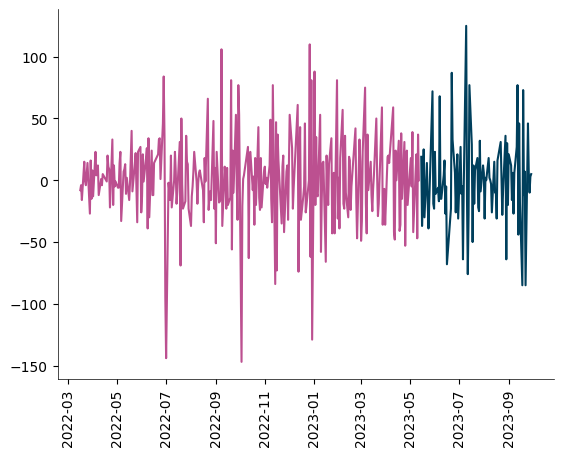

In [84]:
plt.plot(train_TP, color="#bc5090")
plt.plot(test_TP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [369]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2834.211, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2807.119, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2791.746, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2832.234, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2791.950, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2793.491, Time=0.20 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=2793.155, Time=0.22 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2791.992, Time=0.10 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=2794.755, Time=0.33 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2836.079, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2788.238, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2787.364, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2788.412, Time=0.13 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Sat, 11 Nov 2023   AIC                           2785.621
Time:                        23:52:38   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.000     917.458    1164.861
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                53.67
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.27
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [370]:
modelo_sarima_TP = SARIMAX(train_TP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Sat, 11 Nov 2023   AIC                           2785.621
Time:                        23:52:55   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.0

In [87]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [88]:
# Utilizando el modelo realizamos la prediccion correspondiente
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [89]:
predicciones_TP = result_sarima_TP.get_forecast(95)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [90]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()

In [91]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index

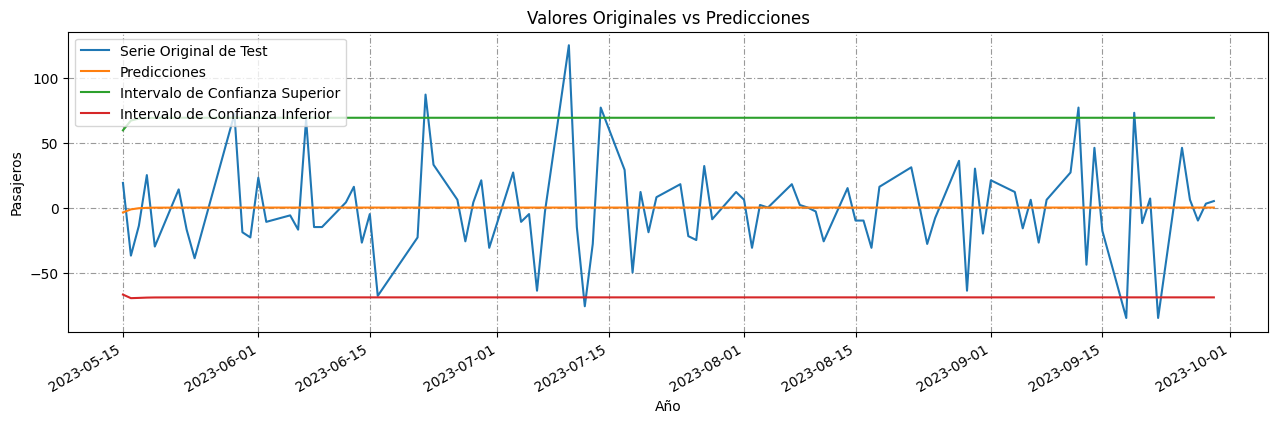

In [92]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)

In [371]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [94]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)

MSE: 1280.0073172822686
MAE: 26.368294893665972
RMSE: 35.77718990197901
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TRÁMITES A DISTANCIA**

In [95]:
# Seleccionamos el primer 75% para train
train_TAD = data_diff_TAD.iloc[:round(len(data_diff_TAD)*.75)]
# Seleccionamos el 25% restante para test
test_TAD = data_diff_TAD.iloc[round(len(data_diff_TAD)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TAD, test_TAD)

FECHA
2022-03-16   -27.0
2022-03-17    15.0
2022-03-18   -21.0
2022-03-21    24.0
2022-03-22   -10.0
              ... 
2023-05-08     4.0
2023-05-09    -5.0
2023-05-10    -9.0
2023-05-11    13.0
2023-05-12    -9.0
Name: TAD, Length: 284, dtype: float64 FECHA
2023-05-15     8.0
2023-05-16    12.0
2023-05-17    -5.0
2023-05-18     0.0
2023-05-19   -17.0
              ... 
2023-09-25     8.0
2023-09-26     4.0
2023-09-27     0.0
2023-09-28    -2.0
2023-09-29   -13.0
Name: TAD, Length: 95, dtype: float64


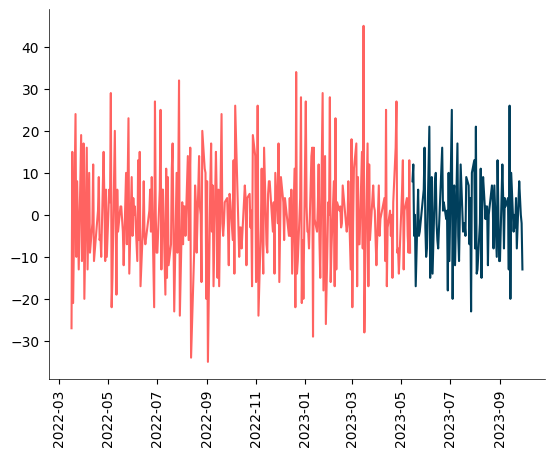

In [96]:
plt.plot(train_TAD, color="#ff6361")
plt.plot(test_TAD, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [97]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2276.279, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2209.856, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2120.568, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2274.287, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2118.618, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2120.560, Time=0.14 sec


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2119.947, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2118.721, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2207.863, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2117.160, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2119.132, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2119.135, Time=0.10 sec
 ARIMA(0,0,1)(1,0,1)[7]             : AIC=2118.368, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7]             : AIC=2117.490, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[7]             : AIC=2117.593, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=2205.867, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[7]             : AIC=2119.227, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[7]          
Total fit time: 2.480 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Sat, 11 Nov 2023   AIC                           2117.160
Time:                        22:46:48   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                31.07
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [372]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Sat, 11 Nov 2023   AIC                           2117.160
Time:                        23:54:17   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
Ljung-Box (L1) (Q):                   1.73   Jarque-

In [99]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [100]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [101]:
predicciones_TAD = result_sarima_TAD.get_forecast(95)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [102]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()

In [103]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index

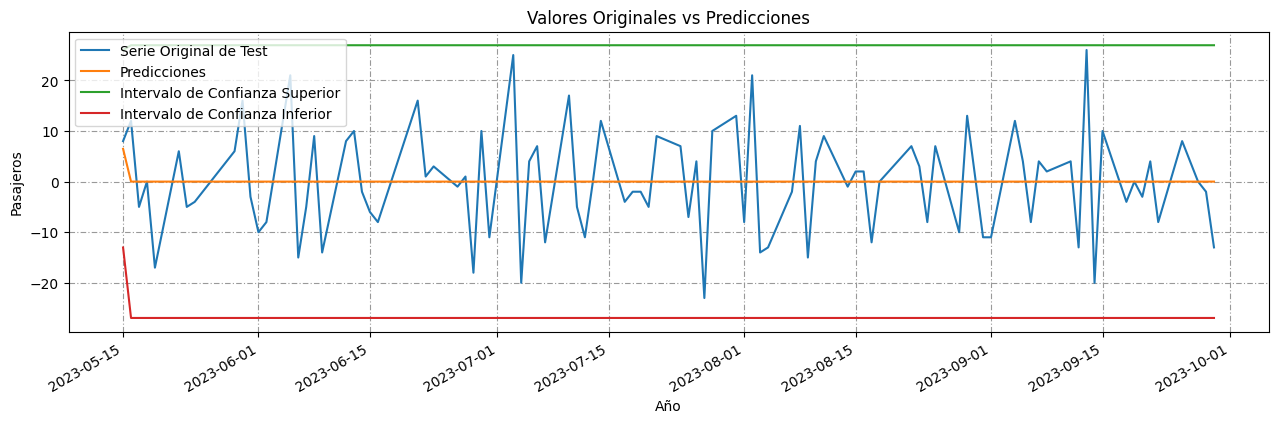

In [104]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)

In [105]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [106]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)

MSE: 105.4981994649892
MAE: 8.26869567898863
RMSE: 10.271231643040148
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PLANES DE PAGO**

In [107]:
# Seleccionamos el primer 75% para train
train_PP = data_diff_PP.iloc[:round(len(data_diff_PP)*.75)]
# Seleccionamos el 25% restante para test
test_PP = data_diff_PP.iloc[round(len(data_diff_PP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_PP, test_PP)

FECHA
2022-03-16    3.0
2022-03-17    2.0
2022-03-18   -5.0
2022-03-21   -1.0
2022-03-22    5.0
             ... 
2023-05-08    2.0
2023-05-09   -6.0
2023-05-10   -1.0
2023-05-11    3.0
2023-05-12    3.0
Name: PP, Length: 284, dtype: float64 FECHA
2023-05-15     7.0
2023-05-16   -13.0
2023-05-17     1.0
2023-05-18    19.0
2023-05-19   -24.0
              ... 
2023-09-25     3.0
2023-09-26    -6.0
2023-09-27     0.0
2023-09-28     4.0
2023-09-29    -1.0
Name: PP, Length: 95, dtype: float64


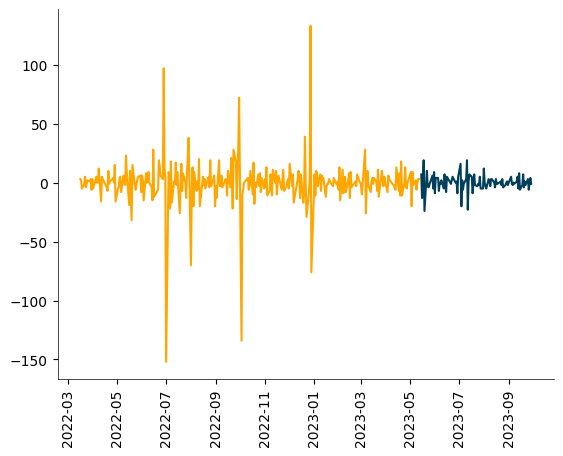

In [108]:
plt.plot(train_PP, color="#ffa600")
plt.plot(test_PP, color="#003f5c")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

In [109]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2519.718, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2511.156, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2498.718, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2517.719, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2498.066, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2498.820, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2500.680, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2478.079, Time=0.07 sec


 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=2478.803, Time=0.18 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=2478.760, Time=0.13 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=2480.758, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=2471.555, Time=0.14 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=2473.410, Time=0.20 sec
 ARIMA(0,0,3)(0,0,1)[7] intercept   : AIC=2473.402, Time=0.19 sec
 ARIMA(0,0,3)(1,0,1)[7] intercept   : AIC=2475.393, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,4)(0,0,0)[7] intercept   : AIC=2472.911, Time=0.12 sec
 ARIMA(1,0,4)(0,0,0)[7] intercept   : AIC=2474.571, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[7]             : AIC=2469.563, Time=0.05 sec
 ARIMA(0,0,3)(1,0,0)[7]             : AIC=2471.417, Time=0.12 sec
 ARIMA(0,0,3)(0,0,1)[7]             : AIC=2471.410, Time=0.11 sec
 ARIMA(0,0,3)(1,0,1)[7]             : AIC=2473.400, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        22:46:56   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.000     317.748     352.524
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4364.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        22:46:56   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [111]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [112]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [113]:
predicciones_PP = result_sarima_PP.get_forecast(95)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [114]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()

In [115]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index

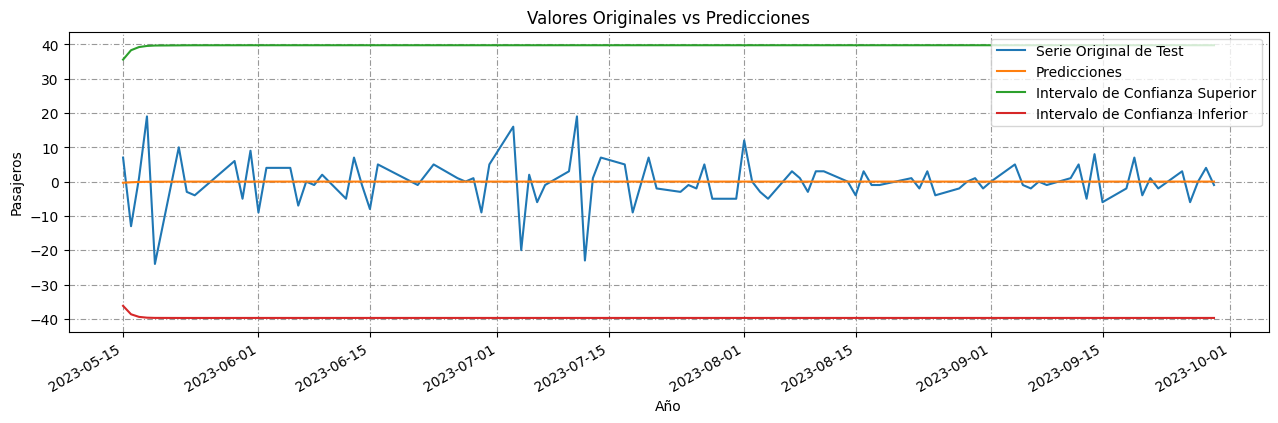

In [116]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)

In [117]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [118]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)

MSE: 46.179120029643386
MAE: 4.655594921004822
RMSE: 6.795522057181728
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


---
## **7. Detallar una comparación con otros modelos estimados.**

**WAPP**

*WAPP1*

In [119]:
modelo_sarima_WAPP1 = SARIMAX(train_WAPP, order=(1,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP1 = modelo_sarima_WAPP1.fit()
print(result_sarima_WAPP1.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1119.031
Date:                Sat, 11 Nov 2023   AIC                           2246.062
Time:                        22:46:57   BIC                           2260.658
Sample:                             0   HQIC                          2251.914
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7806      0.042     18.549      0.000       0.698       0.863
ma.L1         -1.2862      0.613     -2.099      0.036      -2.487      -0.085
ma.L2          0.2864      0.194      1.473      0.1

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [120]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP1 = result_sarima_WAPP1.get_forecast(len(test_WAPP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [121]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [122]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP1.predicted_mean)

MSE: 90.98969305447281
MAE: 7.264451345981322
RMSE: 9.53885176813608
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


*WAPP2*

In [123]:
modelo_sarima_WAPP2 = SARIMAX(train_WAPP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP2 = modelo_sarima_WAPP2.fit()
print(result_sarima_WAPP2.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1120.124
Date:                Sat, 11 Nov 2023   AIC                           2248.248
Time:                        22:46:57   BIC                           2262.844
Sample:                             0   HQIC                          2254.100
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4475      0.066      6.790      0.000       0.318       0.577
ar.L2          0.0534      0.064      0.834      0.404      -0.072       0.179
ma.L1         -0.9079      0.041    -22.255      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [124]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP2 = result_sarima_WAPP2.get_forecast(len(test_WAPP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [125]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [373]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP2.predicted_mean)

MSE: 90.97908008579068
MAE: 7.261640804172692
RMSE: 9.538295449701204
MAPE: nan


*WAPP3 - AVERAGE METHOD*

In [127]:
# Lee el archivo Excel en un DataFrame de pandas
wapp = pd.read_excel("ST_ATENCION1wapp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(wapp.head())

       FECHA  WAPP
0 2022-03-15    19
1 2022-03-16    12
2 2022-03-17    14
3 2022-03-18    67
4 2022-03-21    45


In [128]:
wapp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            WAPP
FECHA           
2022-03-15    19
2022-03-16    12
2022-03-17    14
2022-03-18    67
2022-03-21    45
...          ...
2023-06-06    40
2023-06-07    41
2023-06-08    23
2023-06-09    26
2023-06-12    39

[304 rows x 1 columns]             WAPP
FECHA           
2023-06-13    44
2023-06-14    40
2023-06-15    26
2023-06-16    23
2023-06-21    51
...          ...
2023-09-25    20
2023-09-26    13
2023-09-27    17
2023-09-28    26
2023-09-29    12

[76 rows x 1 columns]


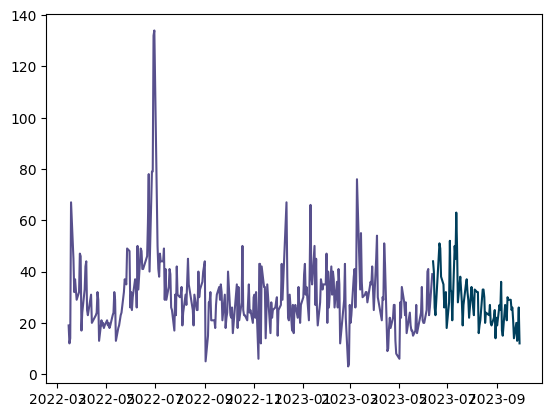

In [129]:
# Seleccionamos el primer 80% para train
train_wapp1 = wapp.iloc[:round(len(wapp)*.80)]

# Seleccionamos el 20% restante para test
test_wapp1 = wapp.iloc[round(len(wapp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_wapp1, test_wapp1)

plt.plot(train_wapp1, color='#58508d')
plt.plot(test_wapp1,color='#003f5c')

In [130]:
numerado = train_wapp1["WAPP"].sum()
denominador = len(train_wapp1)
resultado = numerado / denominador

In [131]:
test_wapp1['prediccion_Average_M'] = resultado

C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4292563017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_wapp1['prediccion_Average_M'] = resultado


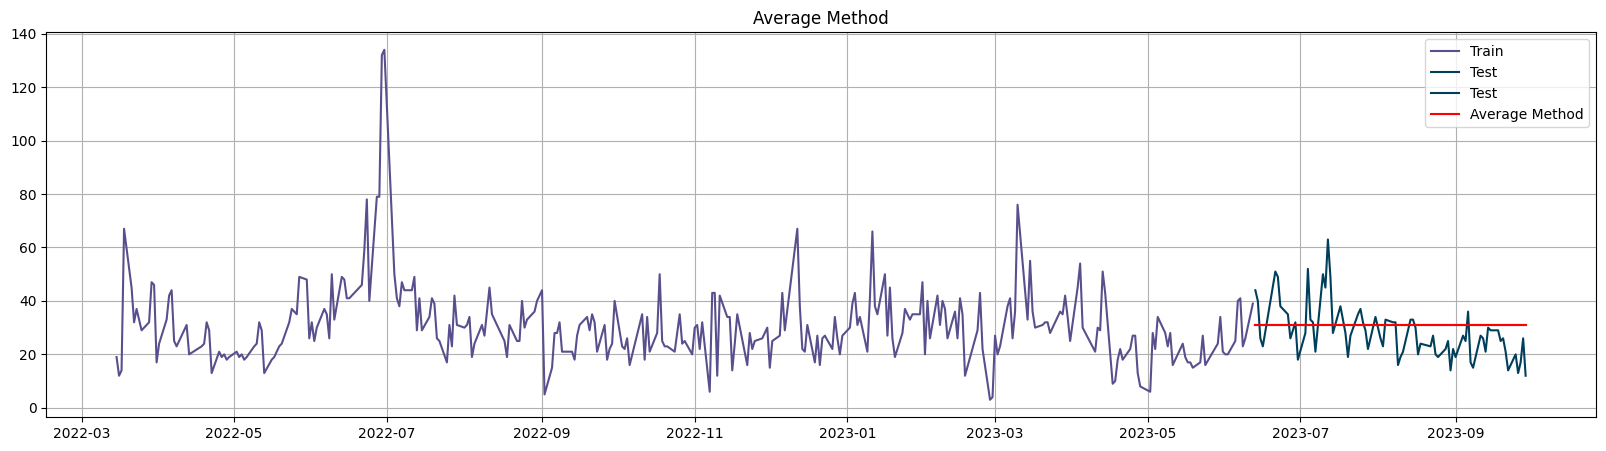

In [132]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_wapp1, label='Train', color="#58508d")
plt.plot(test_wapp1, label='Test', color="#003f5c")
plt.plot(test_wapp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

In [133]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [134]:
MAE_AV_METHOD_WAPP = mean_absolute_error(test_wapp1["WAPP"], test_wapp1['prediccion_Average_M'])
RMSE_AV_METHOD_WAPP = math.sqrt(MAE_AV_METHOD_WAPP)
MAPE_AV_METHOD_WAPP = mean_absolute_percentage_error(test_wapp1["WAPP"], test_wapp1['prediccion_Average_M'])

In [135]:
resultados_AV_METHOD_WAPP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_WAPP] ,'RMSE': [RMSE_AV_METHOD_WAPP], 'MAPE': [MAPE_AV_METHOD_WAPP]})
resultados_AV_METHOD_WAPP = resultados_AV_METHOD_WAPP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_WAPP

Metodo       MAE      RMSE      MAPE
0  Average Method  8.220914  2.867214  0.349066

- - - -

In [375]:
modelo_sarima_TP1 = SARIMAX(train_TP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP1 = modelo_sarima_TP1.fit()
print(result_sarima_TP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1393.025
Date:                Sat, 11 Nov 2023   AIC                           2790.050
Time:                        23:57:15   BIC                           2797.348
Sample:                             0   HQIC                          2792.976
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4666      0.033    -14.199      0.000      -0.531      -0.402
sigma2      1065.5454     55.218     19.297      0.000     957.320    1173.771
Ljung-Box (L1) (Q):                   0.76   Jarque-

In [376]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP1 = result_sarima_TP1.get_forecast(len(test_TP))

In [377]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [378]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP1.predicted_mean)

MSE: 1281.364690132389
MAE: 26.391444055889444
RMSE: 35.79615468360238
MAPE: nan


*TP2*

In [379]:
modelo_sarima_TP2 = SARIMAX(train_TP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_TP2 = modelo_sarima_TP2.fit()
print(result_sarima_TP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1399.916
Date:                Sat, 11 Nov 2023   AIC                           2803.832
Time:                        23:57:52   BIC                           2811.130
Sample:                             0   HQIC                          2806.758
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3181      0.040     -8.024      0.000      -0.396      -0.240
sigma2      1119.1088     59.271     18.881      0.000    1002.941    1235.277
Ljung-Box (L1) (Q):                   0.91   Jarque-

In [141]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP2 = result_sarima_TP2.get_forecast(len(test_TP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [142]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [143]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP2.predicted_mean)

MSE: 1280.2636030857432
MAE: 26.368995605695694
RMSE: 35.780771415464805
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TP 3 - AVERAGE METHOD**

In [144]:
# Lee el archivo Excel en un DataFrame de pandas
tp = pd.read_excel("ST_ATENCION1tp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(tp.head())


       FECHA  TP
0 2022-01-03  37
1 2022-01-04  24
2 2022-01-05  39
3 2022-01-06  33
4 2022-01-07  29


In [145]:
tp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset

             TP
FECHA          
2022-01-03   37
2022-01-04   24
2022-01-05   39
2022-01-06   33
2022-01-07   29
...         ...
2023-05-19  132
2023-05-22  146
2023-05-23  129
2023-05-24   90
2023-05-29  162

[343 rows x 1 columns]              TP
FECHA          
2023-05-30  143
2023-05-31  120
2023-06-01  143
2023-06-02  132
2023-06-05  126
...         ...
2023-09-25  112
2023-09-26  118
2023-09-27  108
2023-09-28  111
2023-09-29  116

[86 rows x 1 columns]


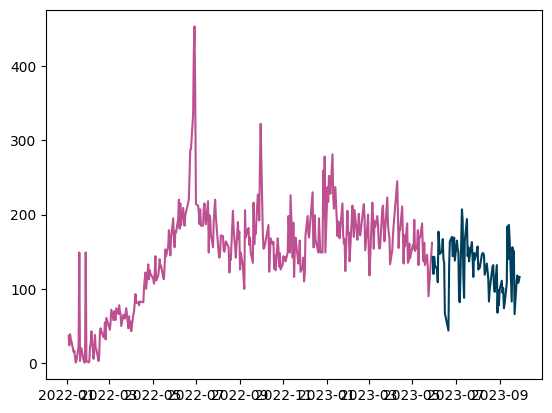

In [146]:
# Seleccionamos el primer 80% para train
train_tp1 = tp.iloc[:round(len(tp)*.80)]

# Seleccionamos el 20% restante para test
test_tp1 = tp.iloc[round(len(tp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_tp1, test_tp1)

plt.plot(train_tp1,  color= "#bc5090")
plt.plot(test_tp1, color="#003f5c")


In [147]:
numerado = train_tp1["TP"].sum()
denominador = len(train_tp1)
resultado = numerado / denominador


In [148]:
test_tp1['prediccion_Average_M'] = resultado

C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\1465531796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tp1['prediccion_Average_M'] = resultado


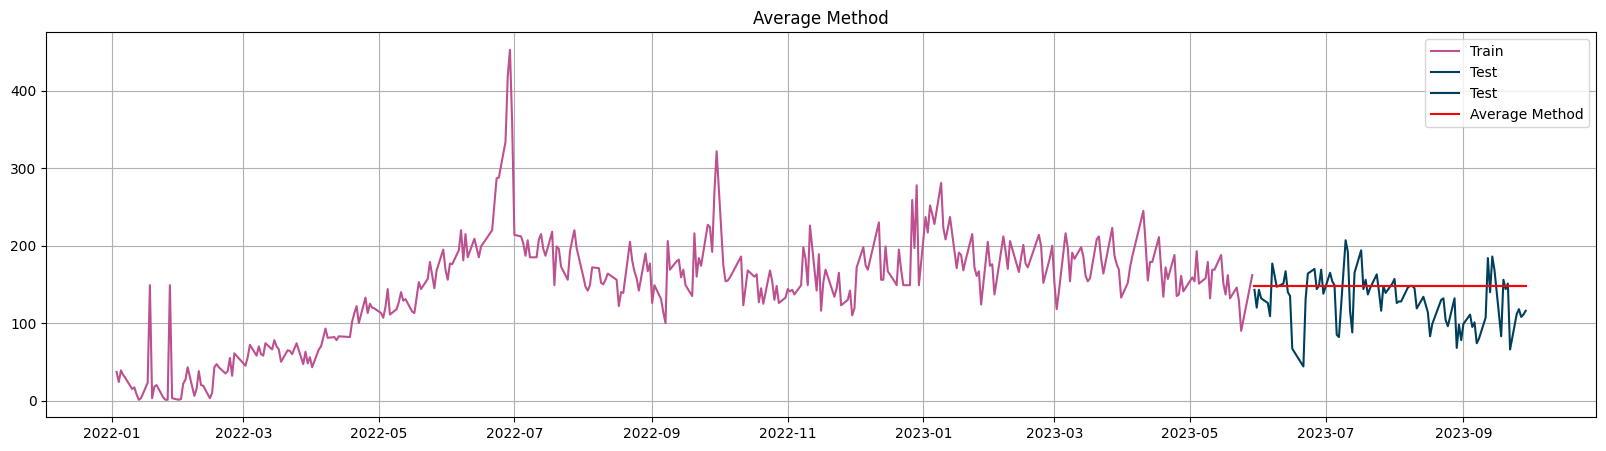

In [149]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_tp1, label='Train', color="#bc5090")
plt.plot(test_tp1, label='Test', color="#003f5c")
plt.plot(test_tp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [150]:
MAE_AV_METHOD_TP = mean_absolute_error(test_tp1["TP"], test_tp1['prediccion_Average_M'])
RMSE_AV_METHOD_TP = math.sqrt(MAE_AV_METHOD_TP)
MAPE_AV_METHOD_TP = mean_absolute_percentage_error(test_tp1["TP"], test_tp1['prediccion_Average_M'])


In [151]:
resultados_AV_METHOD_TP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_TP] ,'RMSE': [RMSE_AV_METHOD_TP], 'MAPE': [MAPE_AV_METHOD_TP]})
resultados_AV_METHOD_TP = resultados_AV_METHOD_TP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_TP


Metodo        MAE      RMSE      MAPE
0  Average Method  27.974202  5.289064  0.285819

- - - --

*TAD1*

In [152]:
modelo_sarima_TAD1 = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD1 = modelo_sarima_TAD1.fit()
print(result_sarima_TAD1.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Sat, 11 Nov 2023   AIC                           2117.490
Time:                        22:46:58   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [153]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD1 = result_sarima_TAD1.get_forecast(len(test_TAD))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [154]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [155]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD1.predicted_mean)

MSE: 105.41216593477476
MAE: 8.271369847474167
RMSE: 10.267042706387013
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


*TAD2*

In [380]:
modelo_sarima_TAD2 = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD2 = modelo_sarima_TAD2.fit()
print(result_sarima_TAD2.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Sat, 11 Nov 2023   AIC                           2117.490
Time:                        23:58:56   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

In [381]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD2 = result_sarima_TAD2.get_forecast(len(test_TAD))

In [158]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [159]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD2.predicted_mean)

MSE: 106.37243621316266
MAE: 8.331325411971331
RMSE: 10.313701382780222
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TAD 3 - AVERAGE METHOD**

In [160]:
# Lee el archivo Excel en un DataFrame de pandas
tad = pd.read_excel("ST_ATENCION1tad.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(tad.head())


       FECHA  TAD
0 2022-01-03   31
1 2022-01-04   24
2 2022-01-05   18
3 2022-01-06   26
4 2022-01-07    9


In [161]:

tad.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            TAD
FECHA          
2022-01-03   31
2022-01-04   24
2022-01-05   18
2022-01-06   26
2022-01-07    9
...         ...
2023-05-19   31
2023-05-22   37
2023-05-23   32
2023-05-24   28
2023-05-29   34

[343 rows x 1 columns]             TAD
FECHA          
2023-05-30   50
2023-05-31   47
2023-06-01   37
2023-06-02   29
2023-06-05   50
...         ...
2023-09-25   38
2023-09-26   42
2023-09-27   42
2023-09-28   40
2023-09-29   27

[86 rows x 1 columns]


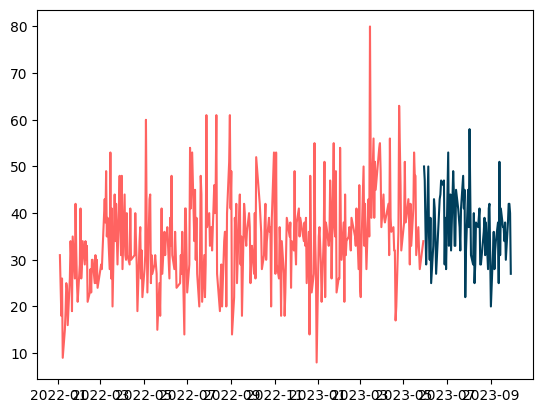

In [162]:
# Seleccionamos el primer 80% para train
train_tad1 = tad.iloc[:round(len(tad)*.80)]

# Seleccionamos el 20% restante para test
test_tad1 = tad.iloc[round(len(tad)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_tad1, test_tad1)

plt.plot(train_tad1, color="#ff6361")
plt.plot(test_tad1, color="#003f5c")


In [163]:
numerado = train_tad1["TAD"].sum()
denominador = len(train_tad1)
resultado = numerado / denominador


In [164]:
test_tad1['prediccion_Average_M'] = resultado

C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\597598933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tad1['prediccion_Average_M'] = resultado


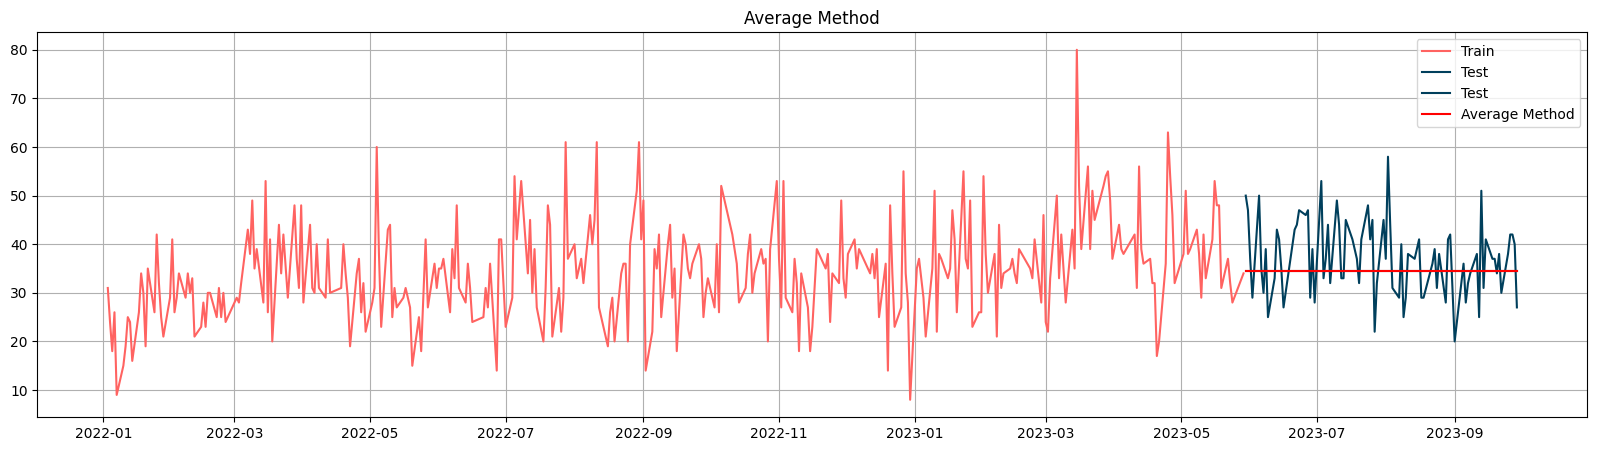

In [165]:

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_tad1, label='Train', color="#ff6361")
plt.plot(test_tad1, label='Test', color="#003f5c")
plt.plot(test_tad1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [166]:
MAE_AV_METHOD_TAD = mean_absolute_error(test_tad1["TAD"], test_tad1['prediccion_Average_M'])
RMSE_AV_METHOD_TAD = math.sqrt(MAE_AV_METHOD_TP)
MAPE_AV_METHOD_TAD = mean_absolute_percentage_error(test_tad1["TAD"], test_tad1['prediccion_Average_M'])


In [167]:
resultados_AV_METHOD_TAD = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_TAD] ,'RMSE': [RMSE_AV_METHOD_TAD], 'MAPE': [MAPE_AV_METHOD_TAD]})
resultados_AV_METHOD_TAD = resultados_AV_METHOD_TAD[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_TAD


Metodo       MAE      RMSE      MAPE
0  Average Method  6.490847  5.289064  0.174366

- - - -

*PP1*

In [382]:
modelo_sarima_PP1 = SARIMAX(train_PP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP1 = modelo_sarima_PP1.fit()
print(result_sarima_PP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1246.033
Date:                Sun, 12 Nov 2023   AIC                           2496.066
Time:                        00:00:06   BIC                           2503.364
Sample:                             0   HQIC                          2498.992
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4162      0.023    -17.942      0.000      -0.462      -0.371
sigma2       378.5429     10.207     37.086      0.000     358.537     398.548
Ljung-Box (L1) (Q):                   3.04   Jarque-

In [169]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP1 = result_sarima_PP1.get_forecast(len(test_PP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [170]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [171]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP1.predicted_mean)

MSE: 46.17768935996087
MAE: 4.655555069139073
RMSE: 6.795416790746604
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


*PP2*

In [383]:
modelo_sarima_PP2 = SARIMAX(train_PP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_PP2 = modelo_sarima_PP2.fit()
print(result_sarima_PP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1251.715
Date:                Sun, 12 Nov 2023   AIC                           2507.431
Time:                        00:00:40   BIC                           2514.728
Sample:                             0   HQIC                          2510.356
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2054      0.028     -7.424      0.000      -0.260      -0.151
sigma2       394.2007      9.136     43.146      0.000     376.294     412.108
Ljung-Box (L1) (Q):                   0.55   Jarque-

In [173]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP2 = result_sarima_PP2.get_forecast(len(test_PP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [174]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [175]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP2.predicted_mean)

MSE: 46.17734109249999
MAE: 4.6555461425697375
RMSE: 6.795391165525351
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


*PP 3 - AVERAGE METHOD*

In [176]:
# Lee el archivo Excel en un DataFrame de pandas
pp = pd.read_excel("ST_ATENCION1pp.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(pp.head())


       FECHA  PP
0 2022-01-03   4
1 2022-01-04   5
2 2022-01-05  12
3 2022-01-06   5
4 2022-01-07   6


In [177]:
pp.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset


            PP
FECHA         
2022-01-03   4
2022-01-04   5
2022-01-05  12
2022-01-06   5
2022-01-07   6
...         ..
2023-05-19   7
2023-05-22  17
2023-05-23  14
2023-05-24  10
2023-05-29  16

[343 rows x 1 columns]             PP
FECHA         
2023-05-30  11
2023-05-31  20
2023-06-01  11
2023-06-02  15
2023-06-05  19
...         ..
2023-09-25  12
2023-09-26   6
2023-09-27   6
2023-09-28  10
2023-09-29   9

[86 rows x 1 columns]


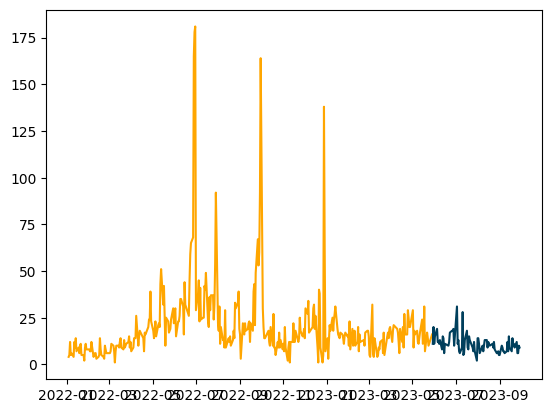

In [178]:
# Seleccionamos el primer 80% para train
train_pp1 = pp.iloc[:round(len(pp)*.80)]

# Seleccionamos el 20% restante para test
test_pp1 = pp.iloc[round(len(pp)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_pp1, test_pp1)

plt.plot(train_pp1, color="#ffa600")
plt.plot(test_pp1, color="#003f5c")

In [179]:
numerado = train_pp1["PP"].sum()
denominador = len(train_pp1)
resultado = numerado / denominador


In [384]:
test_pp1['prediccion_Average_M'] = resultado

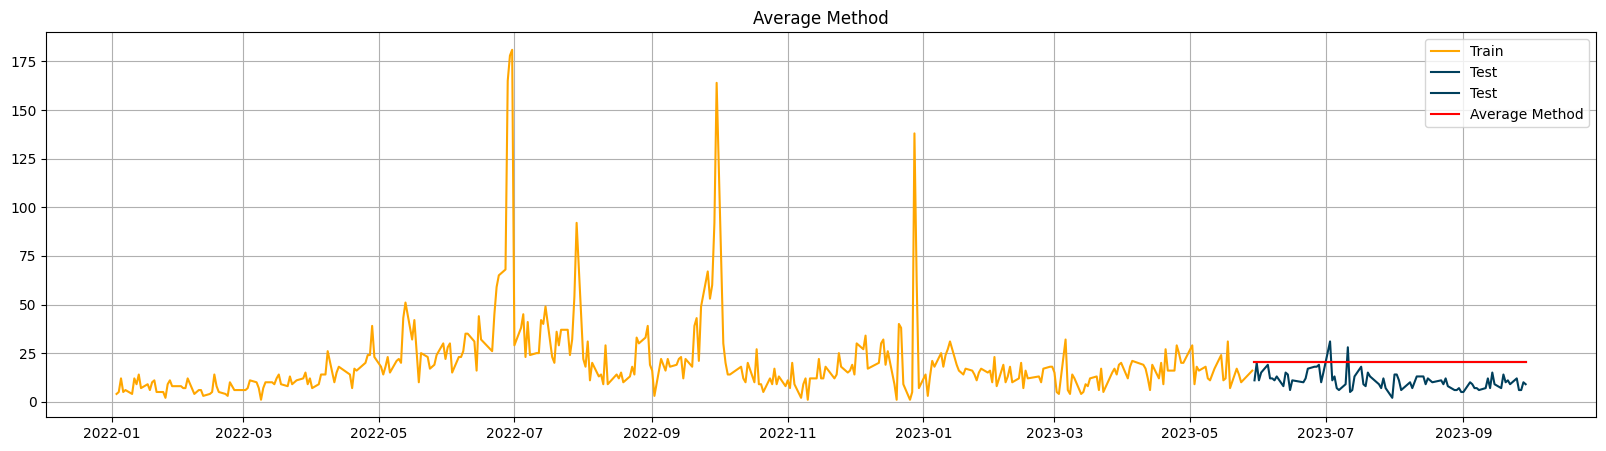

In [181]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_pp1, label='Train', color="#ffa600")
plt.plot(test_pp1, label='Test', color="#003f5c")
plt.plot(test_pp1['prediccion_Average_M'], label='Average Method', color="red")
plt.legend(loc='best')
plt.title('Average Method')
plt.show()


In [182]:
MAE_AV_METHOD_PP= mean_absolute_error(test_pp1["PP"], test_pp1['prediccion_Average_M'])
RMSE_AV_METHOD_PP = math.sqrt(MAE_AV_METHOD_PP)
MAPE_AV_METHOD_PP = mean_absolute_percentage_error(test_pp1["PP"], test_pp1['prediccion_Average_M'])


In [183]:
resultados_AV_METHOD_PP = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD_PP] ,'RMSE': [RMSE_AV_METHOD_PP], 'MAPE': [MAPE_AV_METHOD_PP]})
resultados_AV_METHOD_PP = resultados_AV_METHOD_PP[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD_PP


Metodo        MAE      RMSE      MAPE
0  Average Method  10.041325  3.168805  1.263727

In [184]:
dataframes = [resultados_AV_METHOD_WAPP, resultados_AV_METHOD_TP, 
              resultados_AV_METHOD_TAD, resultados_AV_METHOD_PP]

# Concatenar verticalmente los DataFrames
Resultados = pd.concat(dataframes, ignore_index=True)

Resultados=Resultados.drop('Metodo', axis=1)

Resultados.insert(0, 'SERIE', ['WAPP', 'TP', 'TAD', 'PP'])


# Mostrar el DataFrame unificado
print(Resultados)

  SERIE        MAE      RMSE      MAPE
0  WAPP   8.220914  2.867214  0.349066
1    TP  27.974202  5.289064  0.285819
2   TAD   6.490847  5.289064  0.174366
3    PP  10.041325  3.168805  1.263727


In [386]:
datos_wapp = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MSE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MAE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae]}
modelos_residuos_wapp = pd.DataFrame(datos_wapp)
modelos_residuos_wapp


Modelos          AIC          BIC         MSE       MAE
0    WAPP  2244.320346  2262.565218  153.391164  8.669964
1   WAPP1  2246.061816  2260.657713  155.356019  8.741960
2   WAPP2  2248.247747  2262.843644  156.630968  8.837095

**COMPARACIÓN DE MODELOS**

In [185]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

Modelos          AIC          BIC         MAE       MSE
0    WAPP  2244.320346  2262.565218  153.391164  8.669964
1   WAPP1  2246.061816  2260.657713  155.356019  8.741960
2   WAPP2  2248.247747  2262.843644  156.630968  8.837095

---
## **8. Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).**

**EVALUACIÓN DE RESIDUOS**

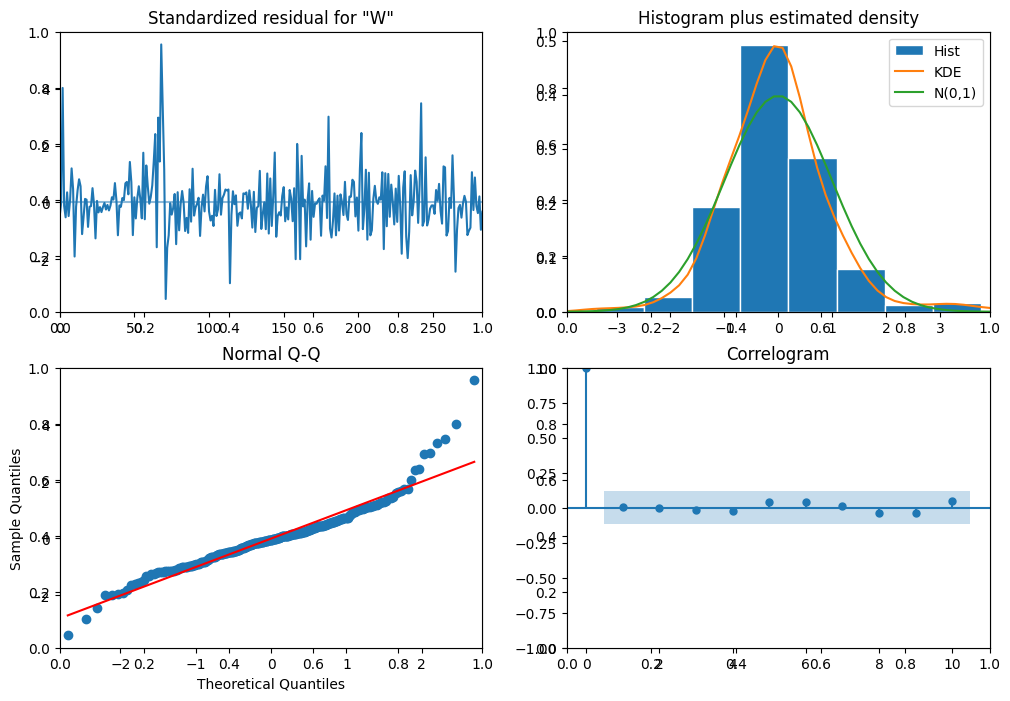

In [186]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP.plot_diagnostics(fig=fig)
plt.show()

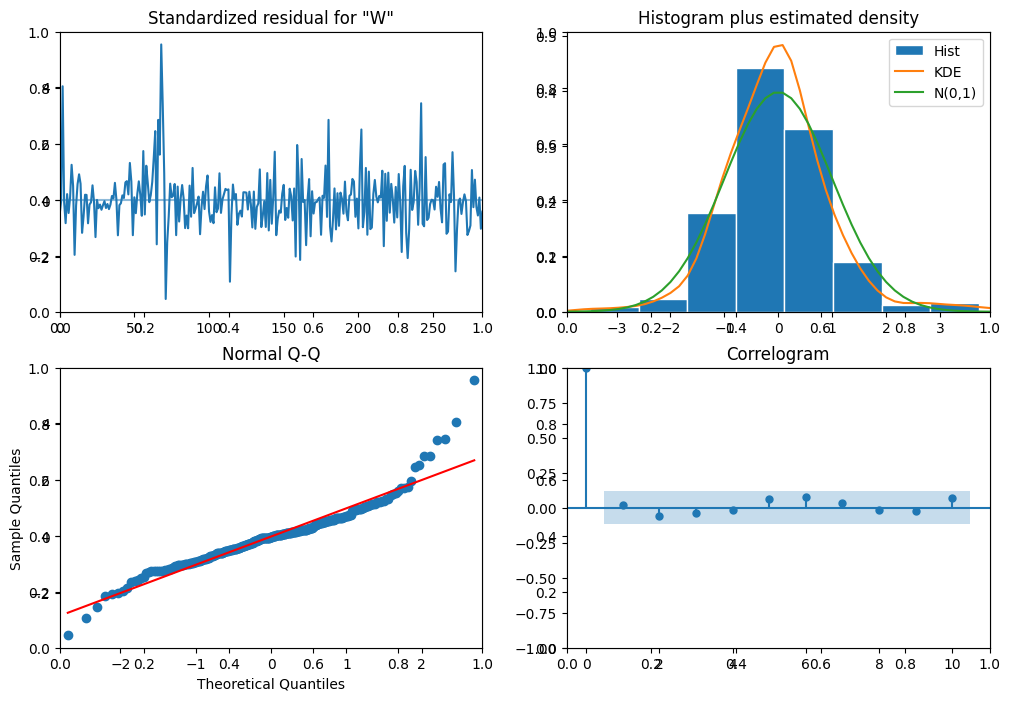

In [187]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP1.plot_diagnostics(fig=fig)
plt.show()

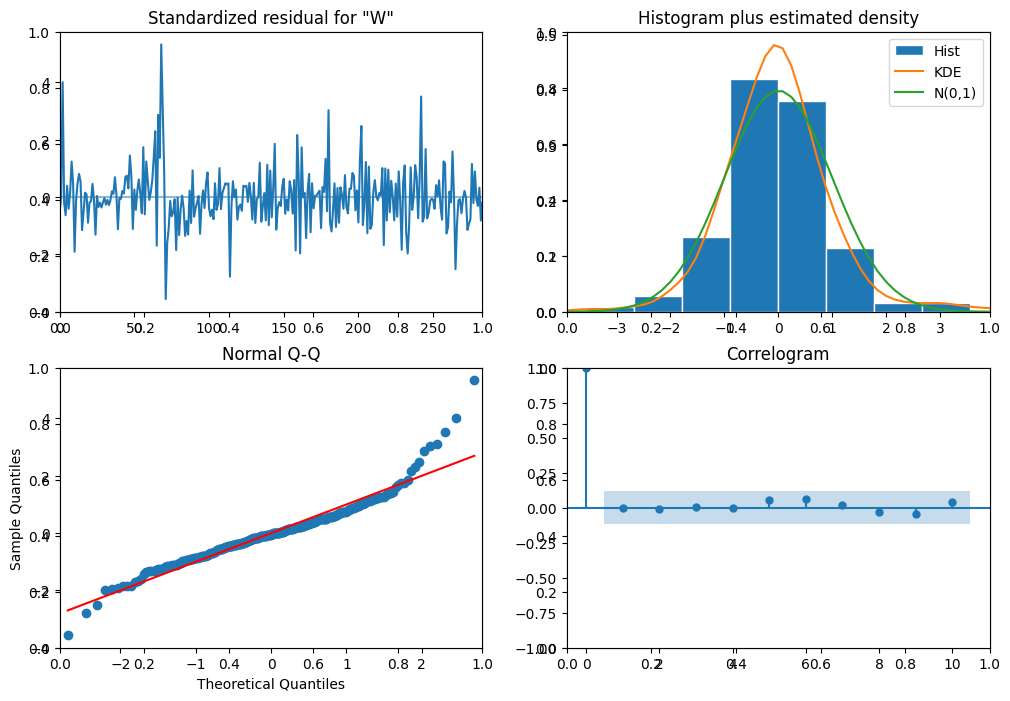

In [188]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP2.plot_diagnostics(fig=fig)
plt.show()

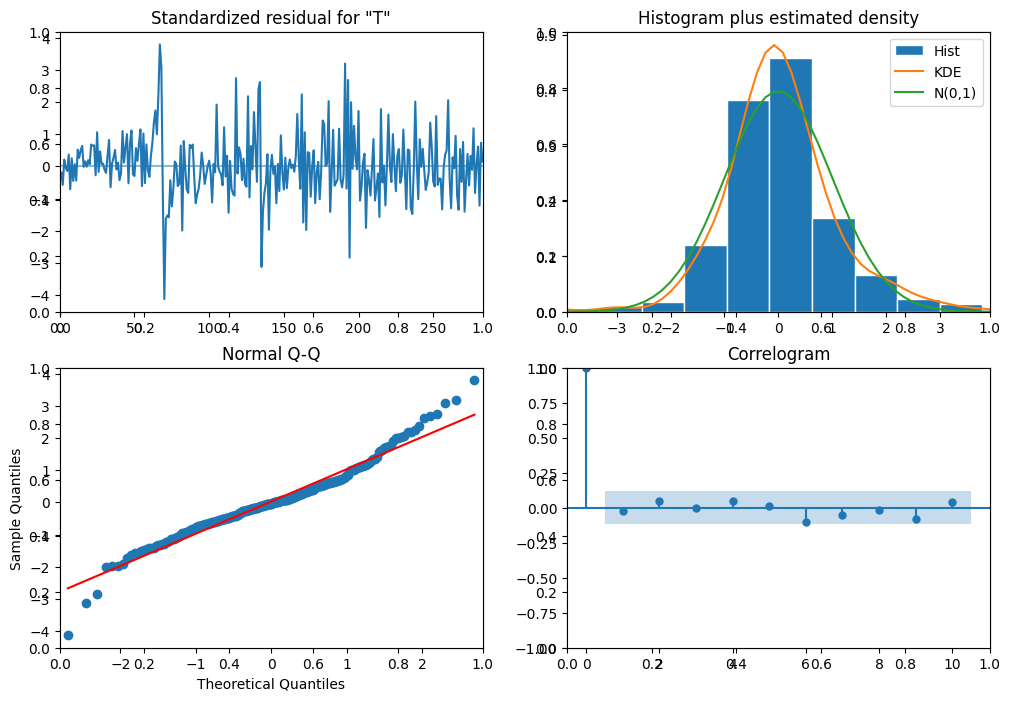

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP.plot_diagnostics(fig=fig)
plt.show()

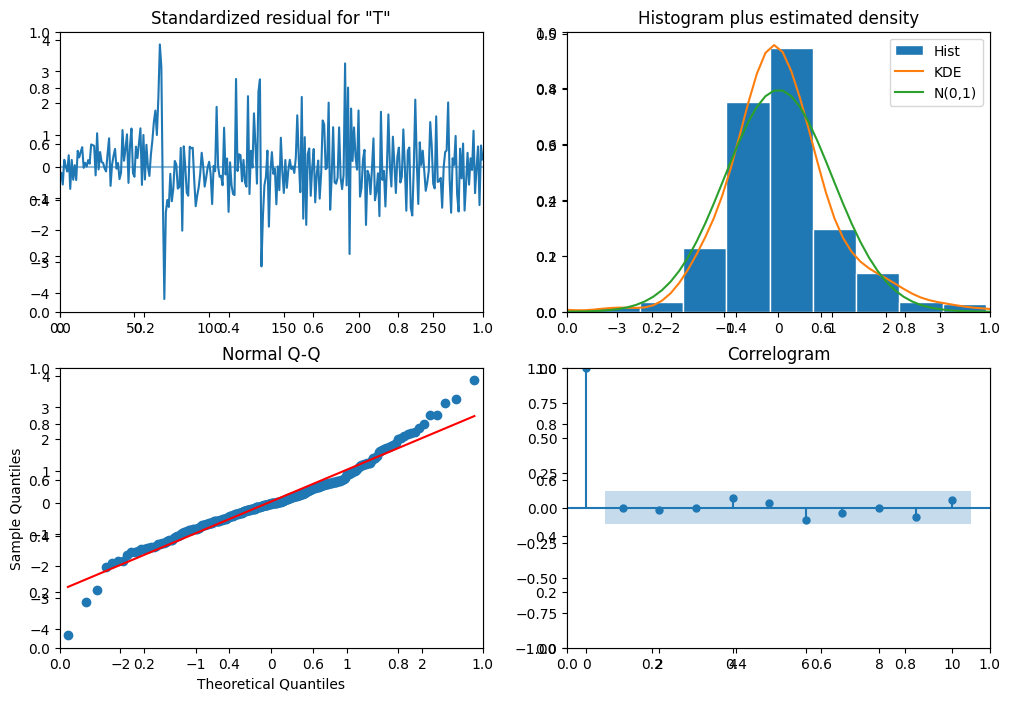

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP1.plot_diagnostics(fig=fig)
plt.show()

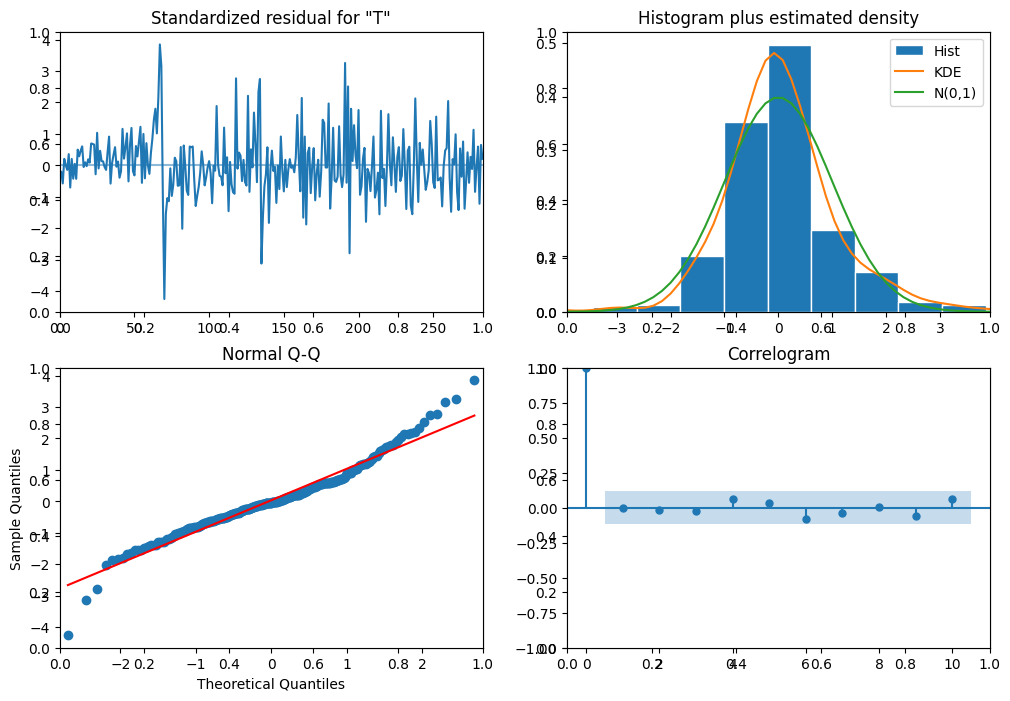

In [191]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP2.plot_diagnostics(fig=fig)
plt.show()

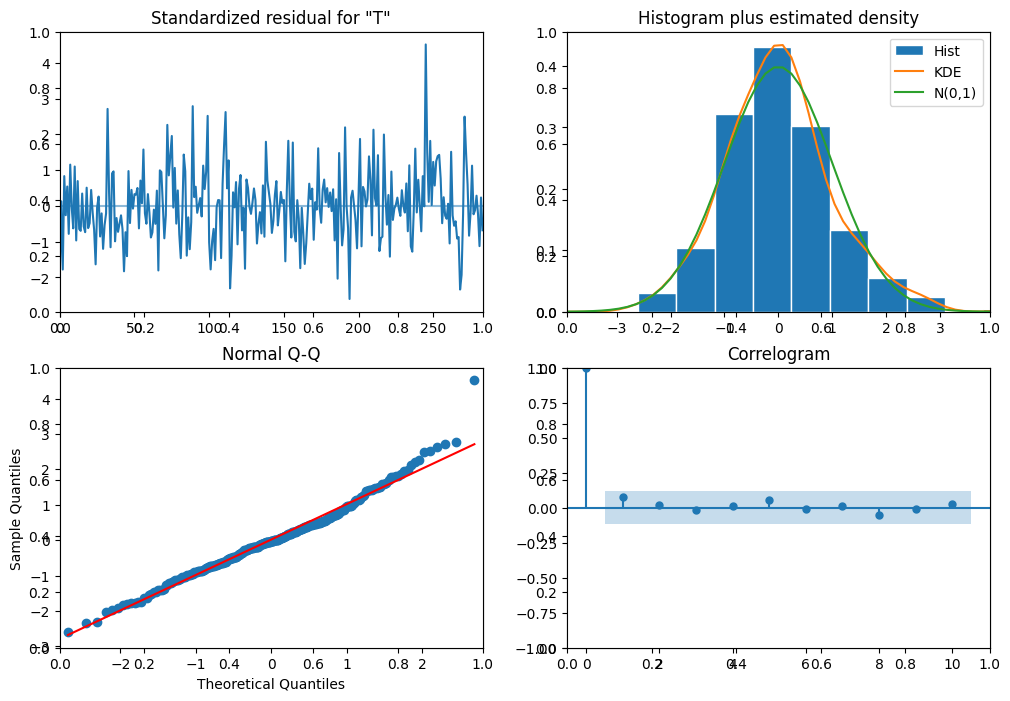

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD.plot_diagnostics(fig=fig)
plt.show()

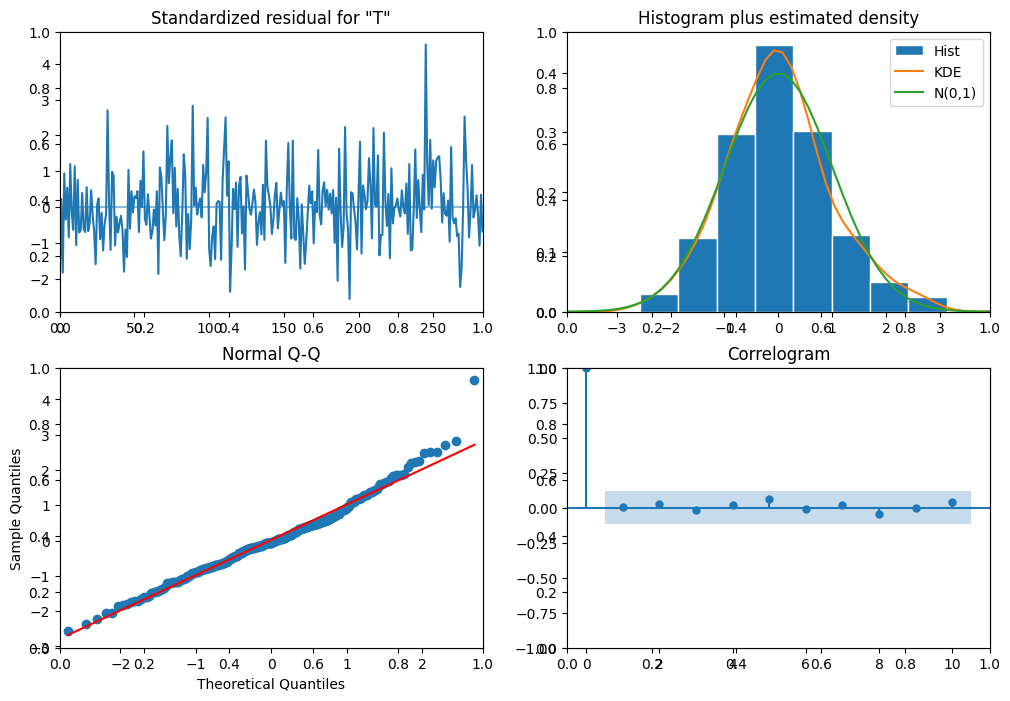

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD1.plot_diagnostics(fig=fig)
plt.show()

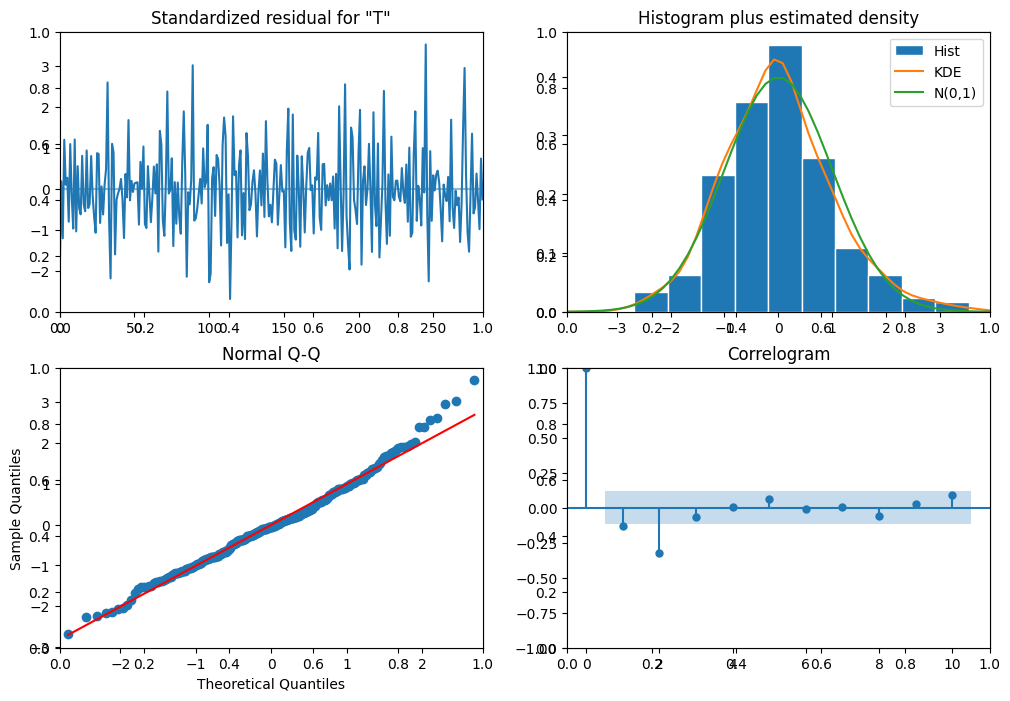

In [194]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD2.plot_diagnostics(fig=fig)
plt.show()

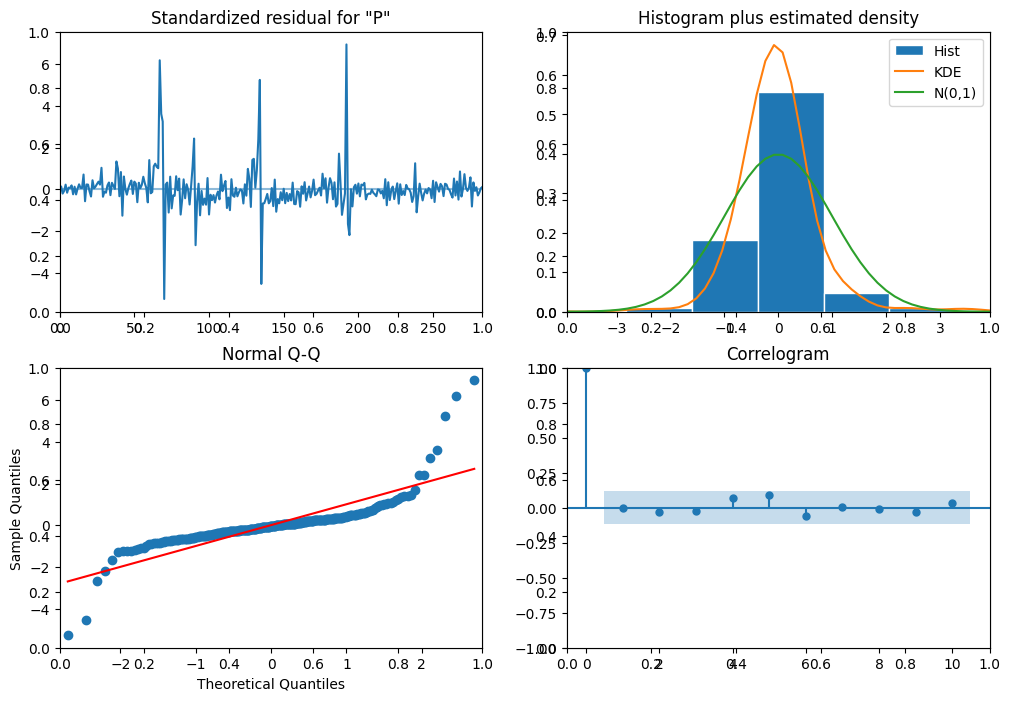

In [195]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP.plot_diagnostics(fig=fig)
plt.show()

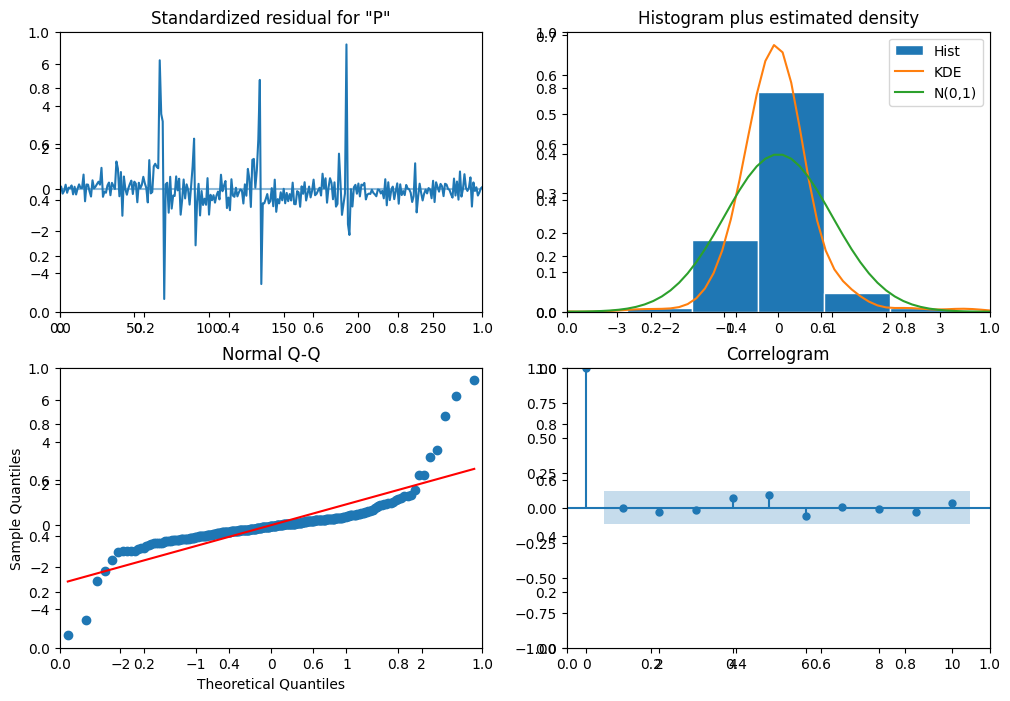

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP1.plot_diagnostics(fig=fig)
plt.show()

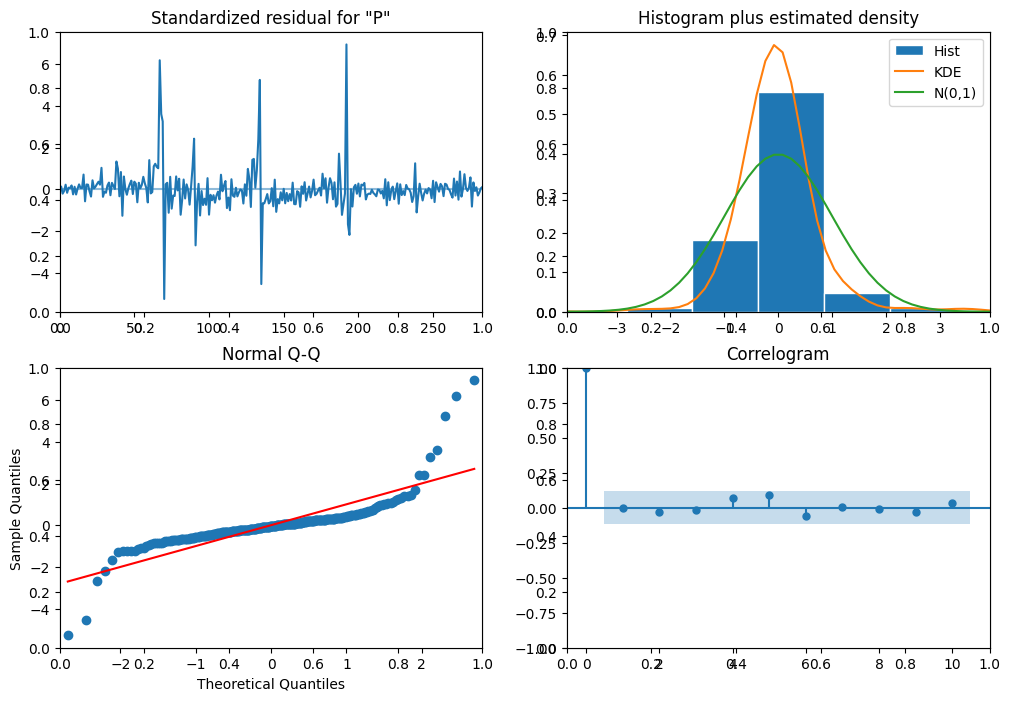

In [197]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP2.plot_diagnostics(fig=fig)
plt.show()

**Test de Breusch-Godfrey, test Ljung-Box de correlación serial y test de Jarque-Bera de normalidad**

**WAPP**

In [387]:
import statsmodels.api as sm
bg_WAPP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_WAPP, nlags=3)
fstat = bg_WAPP[2]
fpval = bg_WAPP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.019627183302019405

fpval: 0.9962571003565488



In [199]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
residuos_WAPP = result_sarima_WAPP.resid
# Test de Ljung-Box
lb_test_WAPP = acorr_ljungbox(residuos_WAPP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_WAPP)

    lb_stat  lb_pvalue
1  0.001656   0.967536


In [200]:
import statsmodels.stats.stattools
from statsmodels.stats.stattools import jarque_bera
residuos_WAPP = result_sarima_WAPP.resid
# Test de Jarque-Bera
jb_test_WAPP = jarque_bera(residuos_WAPP)
print(f"Estadístico de Jarque-Bera: {jb_test_WAPP[0]}")
print(f"P-valor: {jb_test_WAPP[1]}")

Estadístico de Jarque-Bera: 341.87332596939405
P-valor: 5.796295402974272e-75


**TP**

In [201]:
bg_TP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TP, nlags=3)
fstat = bg_TP[2]
fpval = bg_TP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.24871709729762212

fpval: 0.8622189546723685



In [202]:
residuos_TP = result_sarima_TP.resid
# Test de Ljung-Box
lb_test_TP = acorr_ljungbox(residuos_TP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TP)

    lb_stat  lb_pvalue
1  0.140075   0.708207


In [203]:
residuos_TP = result_sarima_TP.resid
# Test de Jarque-Bera
jb_test_TP = jarque_bera(residuos_TP)
print(f"Estadístico de Jarque-Bera: {jb_test_TP[0]}")
print(f"P-valor: {jb_test_TP[1]}")

Estadístico de Jarque-Bera: 53.625603644892465
P-valor: 2.266460341319335e-12


**TAD**

In [204]:
bg_TAD = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TAD, nlags=3)
fstat = bg_TAD[2]
fpval = bg_TAD[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.6186872988784703

fpval: 0.6034197046108625



In [205]:
residuos_TAD = result_sarima_TAD.resid
# Test de Ljung-Box
lb_test_TAD = acorr_ljungbox(residuos_TAD, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TAD)

    lb_stat  lb_pvalue
1  1.545548   0.213794


In [206]:
residuos_TAD = result_sarima_TAD.resid
# Test de Jarque-Bera
jb_test_TAD = jarque_bera(residuos_TAD)
print(f"Estadístico de Jarque-Bera: {jb_test_TAD[0]}")
print(f"P-valor: {jb_test_TAD[1]}")

Estadístico de Jarque-Bera: 29.194294983959573
P-valor: 4.576562447390208e-07


**PP**

In [207]:
bg_PP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_PP, nlags=3)
fstat = bg_PP[2]
fpval = bg_PP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.12242981908104474

fpval: 0.9468304008344517



In [208]:
residuos_PP = result_sarima_PP.resid
# Test de Ljung-Box
lb_test_PP = acorr_ljungbox(residuos_PP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_PP)

    lb_stat  lb_pvalue
1  0.000009   0.997608


In [209]:
residuos_PP = result_sarima_PP.resid
# Test de Breusch-Godfrey
lags = 1  # Número de rezagos a incluir en el test
# Test de Jarque-Bera
jb_test_PP = jarque_bera(residuos_PP)
print(f"Estadístico de Jarque-Bera: {jb_test_PP[0]}")
print(f"P-valor: {jb_test_PP[1]}")

Estadístico de Jarque-Bera: 4357.927654591926
P-valor: 0.0


**Test de Breusch-Pagan**

**WAPP**

In [210]:
import statsmodels.api as sm
residuos_WAPP = result_sarima_WAPP.resid
exog = sm.add_constant(np.arange(len(residuos_WAPP)))
bp_WAPP = sm.stats.het_breuschpagan(residuos_WAPP, exog_het=exog)
bp_statistic = bp_WAPP[0]
bp_pval = bp_WAPP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.8447946789070477

bp_pval: 0.35802908094044994



**TP**

In [211]:
residuos_TP = result_sarima_TP.resid
exog = sm.add_constant(np.arange(len(residuos_TP)))
bp_TP = sm.stats.het_breuschpagan(residuos_TP, exog_het=exog)
bp_statistic = bp_TP[0]
bp_pval = bp_TP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.15444445834581444

bp_pval: 0.694323749117705



**TAD**

In [212]:
residuos_TAD = result_sarima_TAD.resid
exog = sm.add_constant(np.arange(len(residuos_TAD)))
bp_TAD = sm.stats.het_breuschpagan(residuos_TAD, exog_het=exog)
bp_statistic = bp_TAD[0]
bp_pval = bp_TAD[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.35837677240150745

bp_pval: 0.5494091194426596



**PP**

In [213]:
residuos_PP = result_sarima_PP.resid
exog = sm.add_constant(np.arange(len(residuos_PP)))
bp_PP = sm.stats.het_breuschpagan(residuos_PP, exog_het=exog)
bp_statistic = bp_PP[0]
bp_pval = bp_PP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.8066224023333319

bp_pval: 0.36912072641097404



---
### **9. Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.**

**Para realizar los pronósticos seleccionamos los 4 mejores modelos del punto 6 WAPP:(ARIMA 2,0,2), TP:(ARIMA 2,0,1), TAD:(ARIMA 1,0,1) y PP:(ARIMA 1,0,1)**

**WAPP**

In [214]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1117.160
Date:                Sat, 11 Nov 2023   AIC                           2244.320
Time:                        22:47:09   BIC                           2262.565
Sample:                             0   HQIC                          2251.635
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2316      0.219      5.629      0.000       0.803       1.660
ar.L2         -0.2964      0.145     -2.050      0.040      -0.580      -0.013
ma.L1         -1.7257      4.050     -0.426      0.6

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [215]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [216]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [217]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(10)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [218]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()


In [219]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index


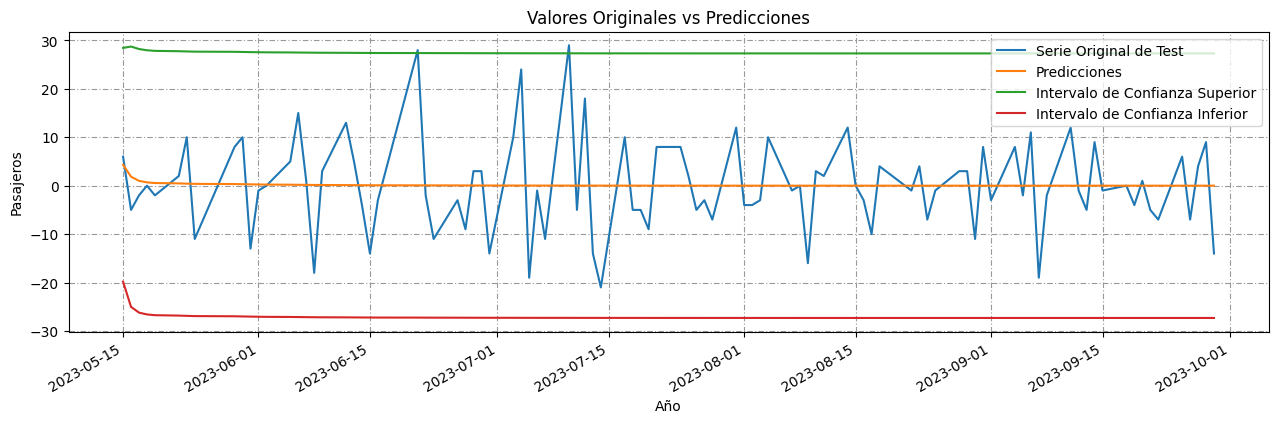

In [220]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)


In [221]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [222]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)


MSE: 90.90918099811735
MAE: 7.252809666546017
RMSE: 9.534630616763156
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TP**

In [223]:
modelo_sarima_TP = SARIMAX(train_TP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1389.022
Date:                Sat, 11 Nov 2023   AIC                           2786.044
Time:                        22:47:10   BIC                           2800.640
Sample:                             0   HQIC                          2791.896
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4234      0.079      5.382      0.000       0.269       0.578
ar.L2          0.0977      0.069      1.408      0.159      -0.038       0.234
ma.L1         -0.8548      0.062    -13.839      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [224]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [225]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))


c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [226]:
predicciones_TP = result_sarima_TP.get_forecast(10)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [227]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()


In [228]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index


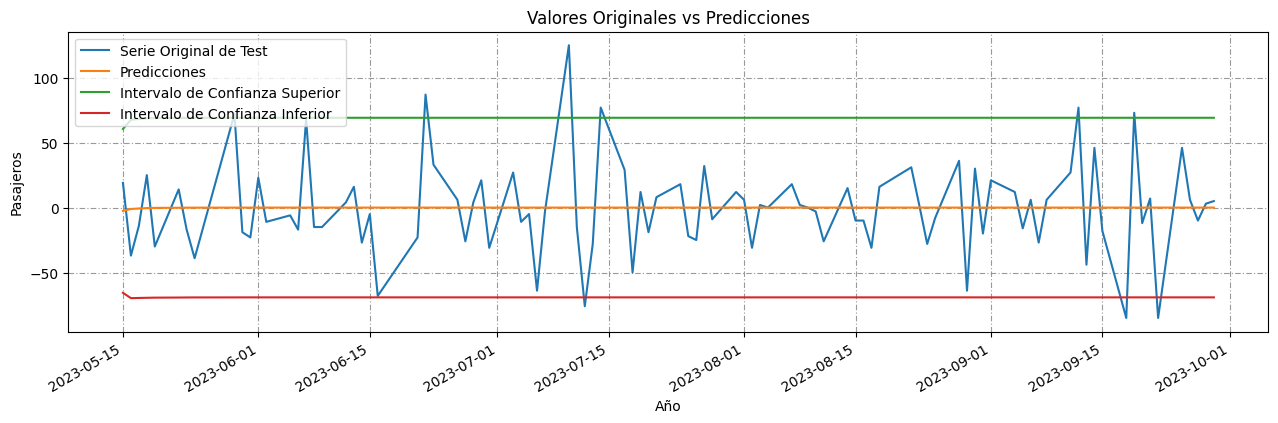

In [229]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)


In [230]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [231]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)


MSE: 1279.6312715041383
MAE: 26.357223836700786
RMSE: 35.77193413144079
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TAD**

In [232]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Sat, 11 Nov 2023   AIC                           2117.490
Time:                        22:47:10   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [309]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [310]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))


c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [311]:
predicciones_TAD = result_sarima_TAD.get_forecast(10)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [312]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()


In [313]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index


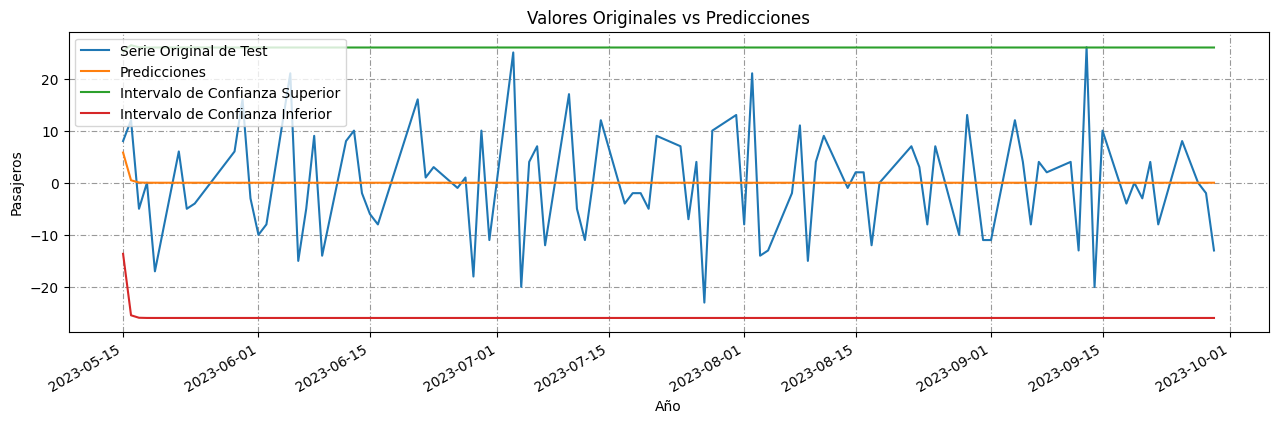

In [314]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)


In [321]:
def invert_transformation(train_df, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train_df.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train_df[col].iloc[-1]-train_df[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train_df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [322]:
TAD_pred = pd.DataFrame(TAD_pred)

In [323]:
TAD_pred.rename(columns={"predicted_mean": "TAD_1d"}, inplace=True)

In [324]:
train_TAD = pd.DataFrame(train_TAD)

In [325]:
df_results = invert_transformation(train_TAD, TAD_pred, second_diff=False)
df_results.loc[:, ['TAD_forecast']]

TAD_forecast
FECHA                   
2023-05-15     -3.211155
2023-05-16     -2.738076
2023-05-17     -2.699414
2023-05-18     -2.696255
2023-05-19     -2.695997
...                  ...
2023-09-25     -2.695974
2023-09-26     -2.695974
2023-09-27     -2.695974
2023-09-28     -2.695974
2023-09-29     -2.695974

[95 rows x 1 columns]

In [245]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [246]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)


MSE: 105.41216593477476
MAE: 8.271369847474167
RMSE: 10.267042706387013
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PP**

In [247]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        22:47:11   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.0

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [248]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [249]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))


c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [250]:
predicciones_PP = result_sarima_PP.get_forecast(10)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [251]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()


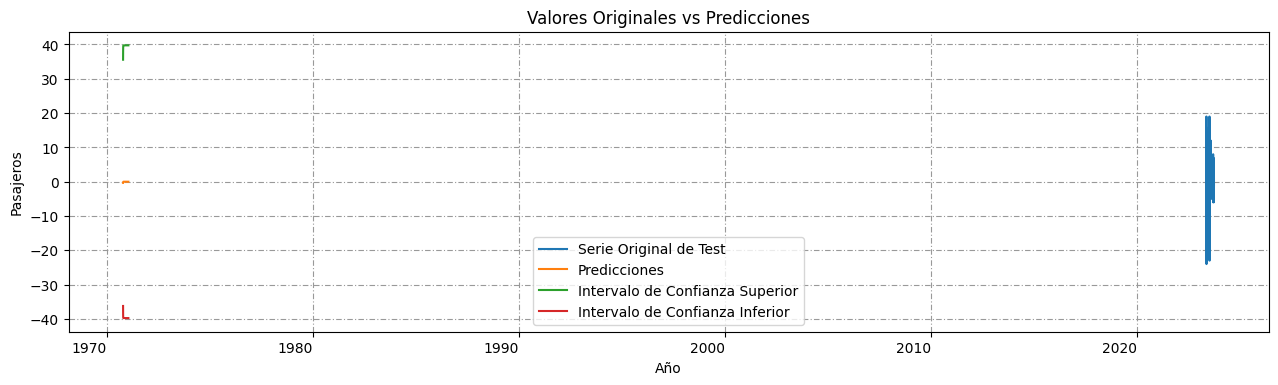

In [252]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)


In [253]:
def invert_transformation(train_df, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train_df.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train_df[col].iloc[-1]-train_df[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train_df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [254]:
PP_pred = pd.DataFrame(PP_pred)

In [255]:
PP_pred.rename(columns={"predicted_mean": "PP_1d"}, inplace=True)

In [256]:
PP_pred

PP_1d
284 -3.297788e-01
285 -1.917864e-01
286 -1.115354e-01
287 -6.486462e-02
288 -3.772272e-02
..            ...
374 -2.146733e-22
375 -1.248455e-22
376 -7.260526e-23
377 -4.222437e-23
378 -2.455603e-23

[95 rows x 1 columns]

In [257]:
train_PP = pd.DataFrame(train_PP)

In [258]:
df_results = invert_transformation(train_PP, PP_pred, second_diff=False)
df_results.loc[:, ['PP_forecast']]

PP_forecast
284     2.670221
285     2.478435
286     2.366899
287     2.302035
288     2.264312
..           ...
374     2.211884
375     2.211884
376     2.211884
377     2.211884
378     2.211884

[95 rows x 1 columns]

In [259]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [260]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)


MSE: 46.179120029643386
MAE: 4.655594921004822
RMSE: 6.795522057181728
MAPE: nan


C:\Users\jnnov\AppData\Local\Temp\ipykernel_59028\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [261]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

Modelos          AIC          BIC         MAE       MSE
0    WAPP  2244.320346  2262.565218  153.391164  8.669964
1   WAPP1  2246.061816  2260.657713  155.356019  8.741960
2   WAPP2  2248.247747  2262.843644  156.630968  8.837095

---
### **10. Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.**

##### **Grafico de las series originales:**

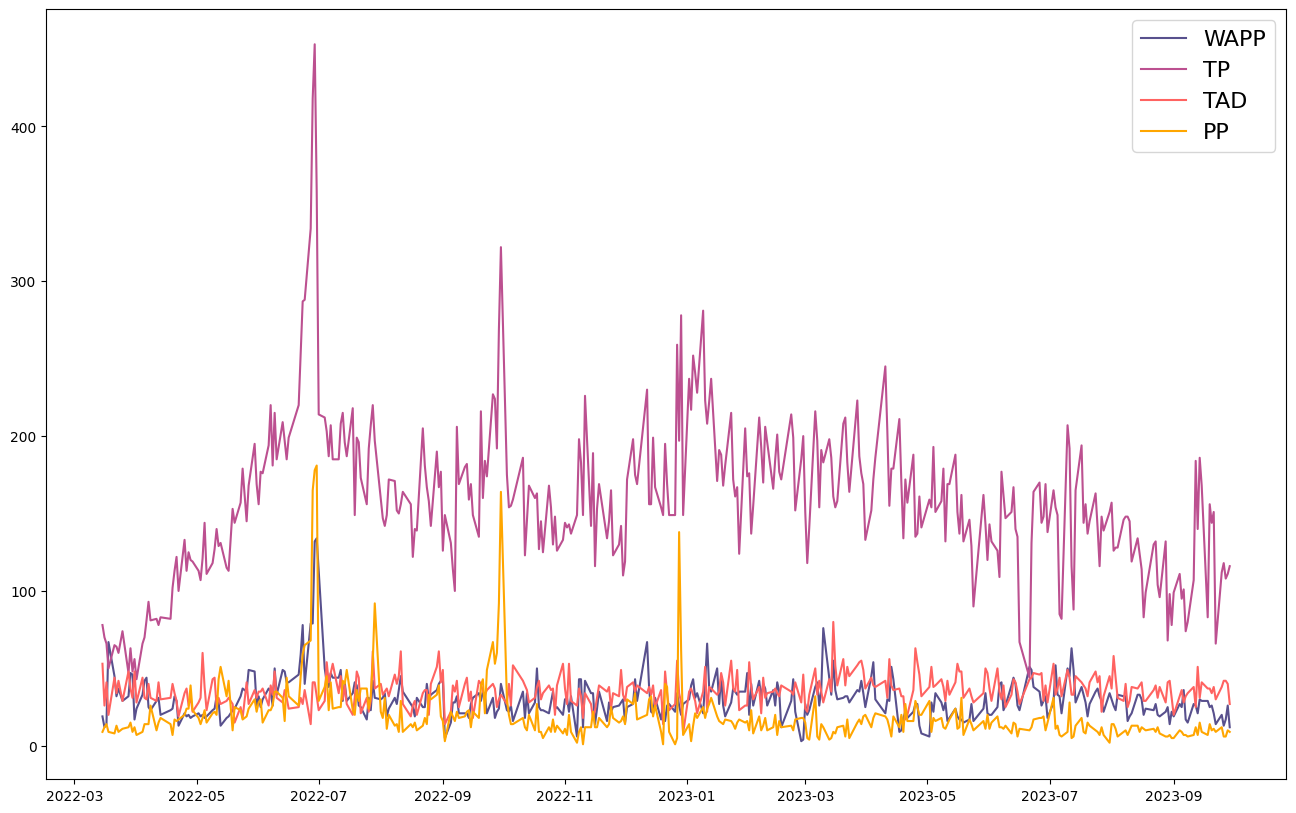

In [262]:
plt.figure(figsize=(16,10))
WAPP, = plt.plot(data ["WAPP"], color='#58508d')
TP, = plt.plot(data ['TP'], color='#bc5090')
TAD, = plt.plot(data ['TAD'], color='#ff6361')
PP, = plt.plot(data ['PP'], color='#ffa600')


#for year in range(2022, 2023):
 #   plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['WAPP','TP',"TAD", "PP"], fontsize=16)

##### **Grafico de las series diferenciadas:**

In [263]:
serieVAR=pd.concat([data_diff_WAPP, data_diff_TP, data_diff_TAD, data_diff_PP], axis=1)

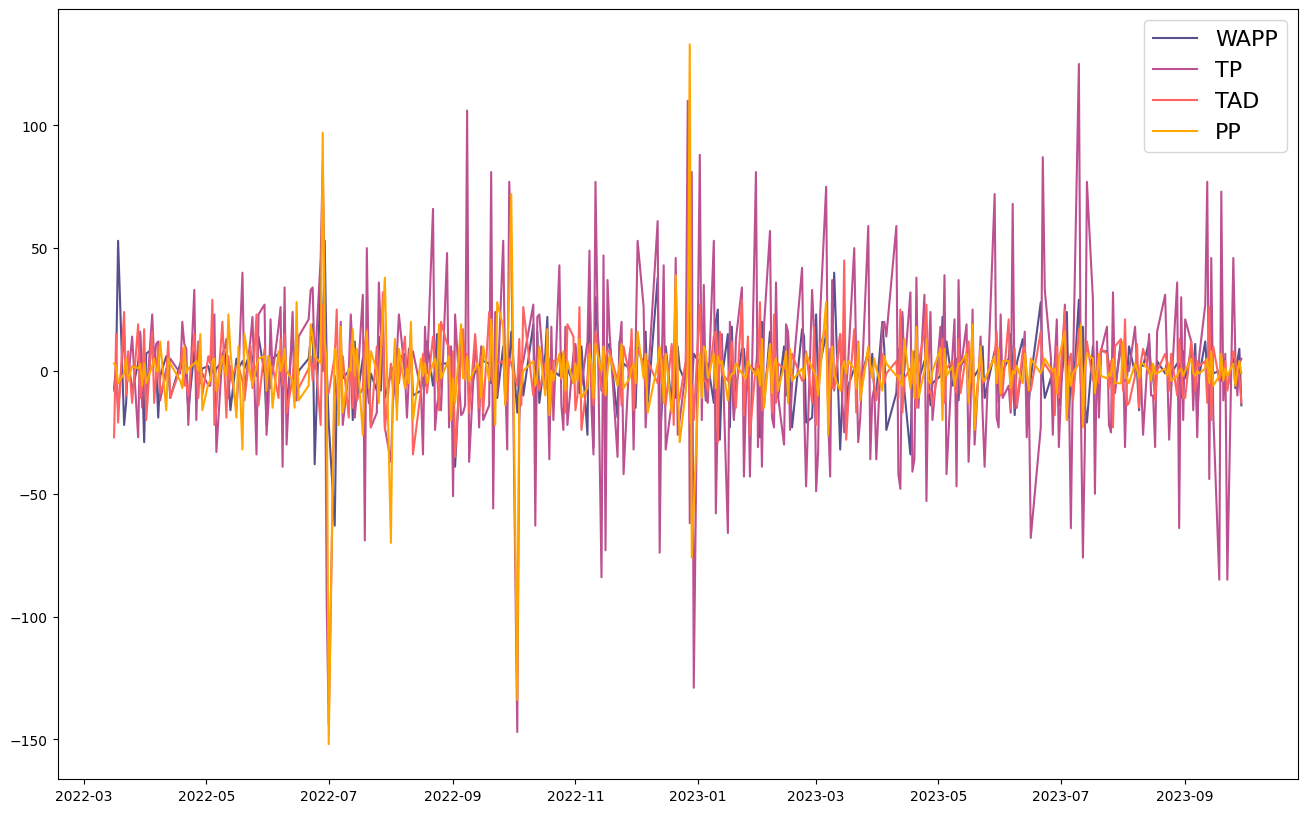

In [264]:
plt.figure(figsize=(16,10))
WAPP, = plt.plot(serieVAR ["WAPP"], color='#58508d')
TP, = plt.plot(serieVAR ['TP'], color='#bc5090')
TAD, = plt.plot(serieVAR ['TAD'], color='#ff6361')
PP, = plt.plot(serieVAR ['PP'], color='#ffa600')


#for year in range(2022, 2023):
 #   plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['WAPP','TP',"TAD", "PP"], fontsize=16)

In [265]:
serieVAR.head()

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0

In [266]:
serieVAR.tail()

WAPP    TP   TAD   PP
FECHA                            
2023-09-25   6.0  46.0   8.0  3.0
2023-09-26  -7.0   6.0   4.0 -6.0
2023-09-27   4.0 -10.0   0.0  0.0
2023-09-28   9.0   3.0  -2.0  4.0
2023-09-29 -14.0   5.0 -13.0 -1.0

In [267]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .75

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

            WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns] 

             WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]


In [268]:
train

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns]

In [269]:
test

WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]

**Criterio de Granger**

In [270]:
from statsmodels.tsa.stattools import grangercausalitytests

In [271]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

In [272]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=10)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  

WAPP_x          TP_x     TAD_x          PP_x
WAPP_y  1.000000  1.761922e-10  0.008664  5.905575e-07
TP_y    0.148711  1.000000e+00  0.258131  8.678813e-04
TAD_y   0.161726  1.941150e-01  1.000000  5.885956e-04
PP_y    0.058835  1.264096e-07  0.035532  1.000000e+00

In [273]:
from statsmodels.tsa.api import VAR

In [274]:
model = VAR(train)

c:\Users\jnnov\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [275]:
x = model.select_order(maxlags=36)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [276]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Nov, 2023
Time:                     22:47:13
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    23.0793
Nobs:                     280.000    HQIC:                   22.5507
Log likelihood:          -4628.74    FPE:                4.36642e+09
AIC:                      22.1966    Det(Omega_mle):     3.44931e+09
--------------------------------------------------------------------
Results for equation WAPP
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.271528         0.699706           -0.388           0.698
L1.WAPP        -0.570077         0.062158           -9.171           0.000
L1.TP           0.091347         0.026286            3.475           0.001
L1.TAD    

In [277]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 4 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [278]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

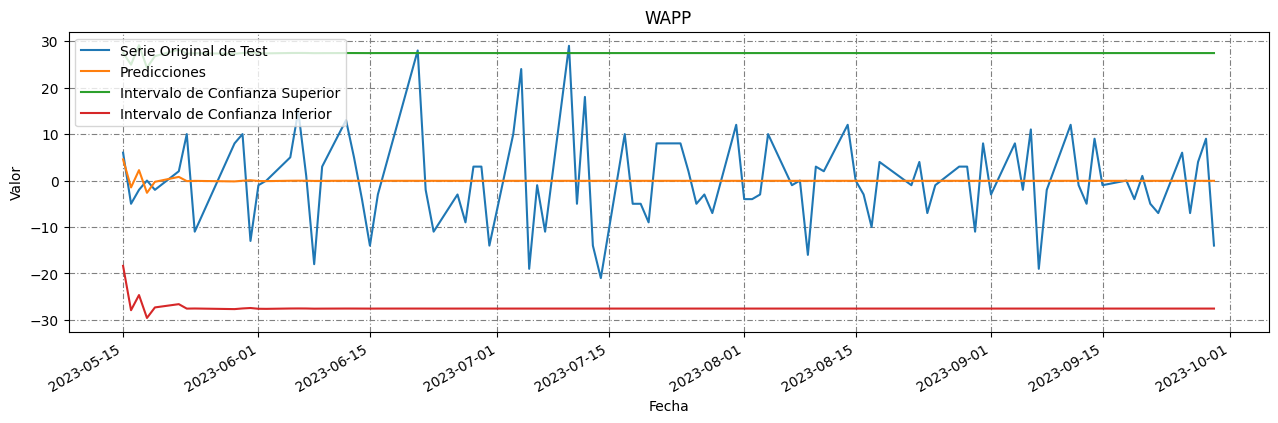

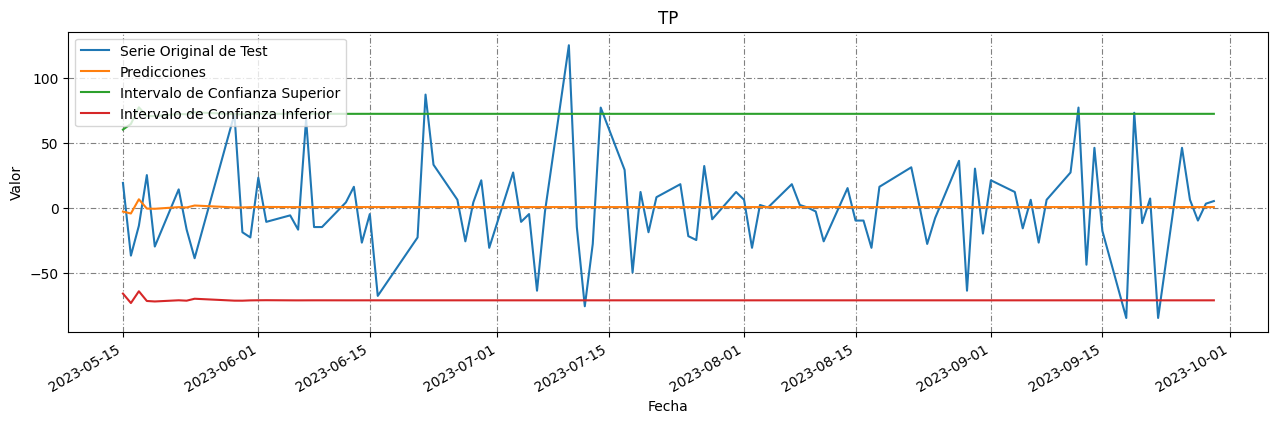

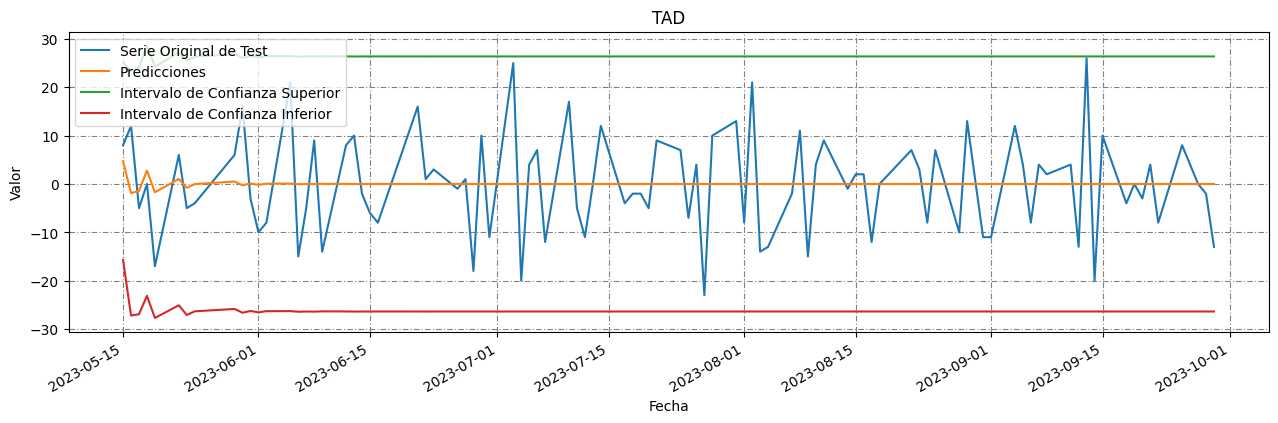

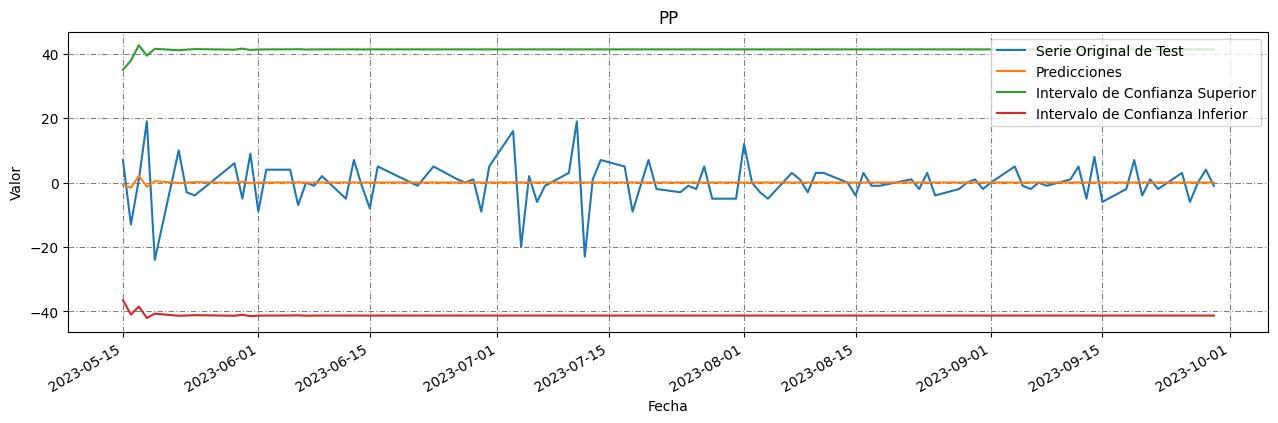

In [279]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 95
lag_orden = 4

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3, 4]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

**Análisis de Residuos**

In [280]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [281]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [282]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [284]:
futuro

95

**WAPP**

MSE: 46.157494759231
MAE: 4.6095748228688125
RMSE: 6.7939307296462035
MAPE: inf
Evaluacion de residuos de Serie 


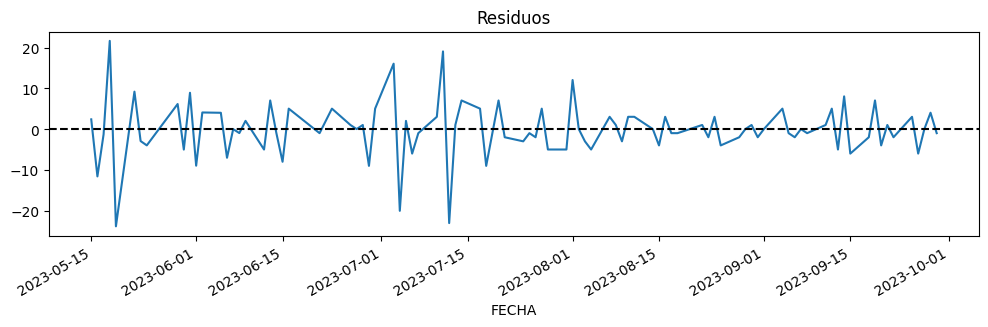

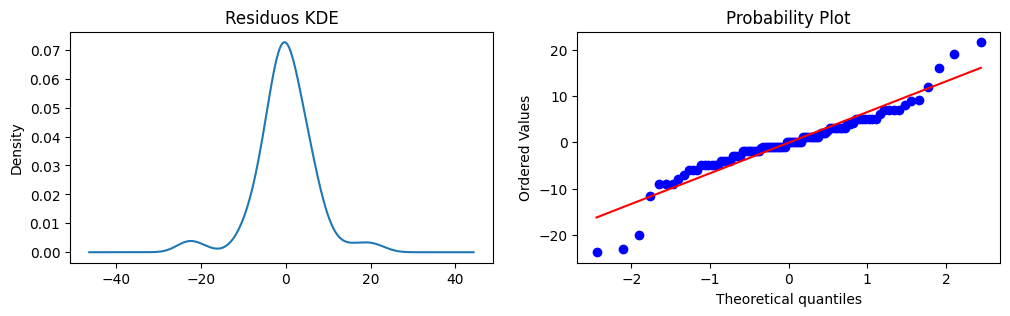

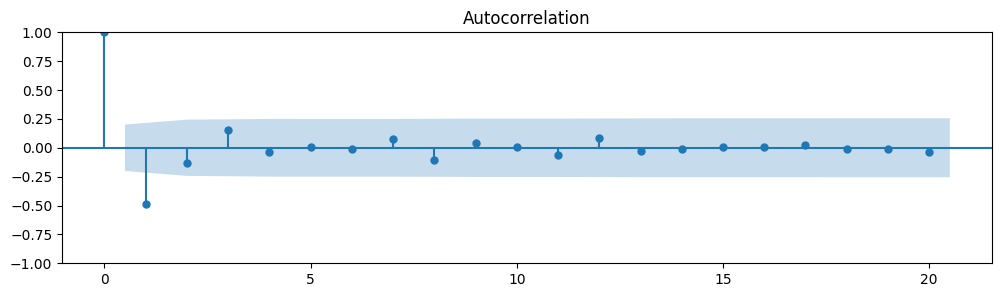

Descriptivo Residuos

count    95.000000
mean     -0.061224
std       6.829696
min     -23.734046
25%      -2.941068
50%       0.058427
75%       3.058931
max      21.637498
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 1.4663276777878428e-10

Shapiro
p-valor: 2.064428190351464e-05



In [285]:
evaluar_metricas(test[serie][:futuro], df[0].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

**TP**

MSE: 46.081901089758816
MAE: 4.738871993738462
RMSE: 6.7883651264320495
MAPE: inf
Evaluacion de residuos de Serie 


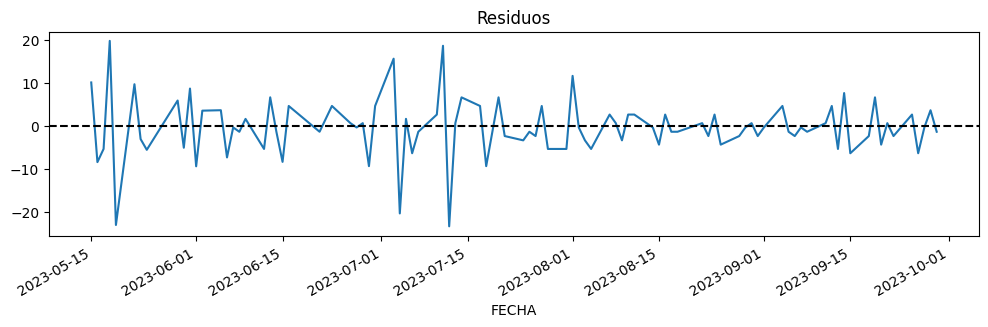

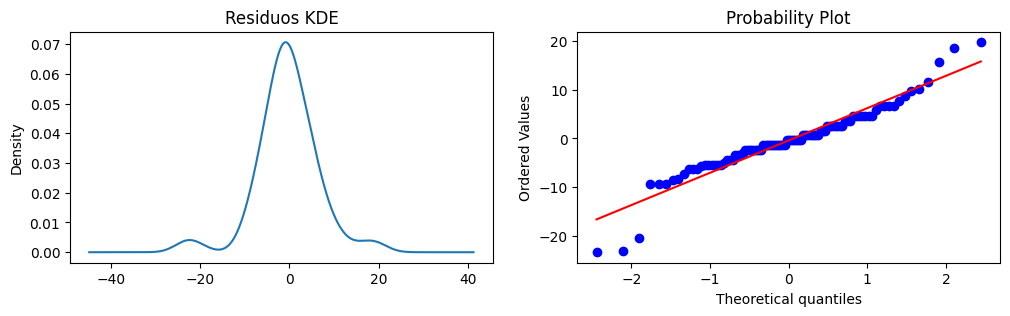

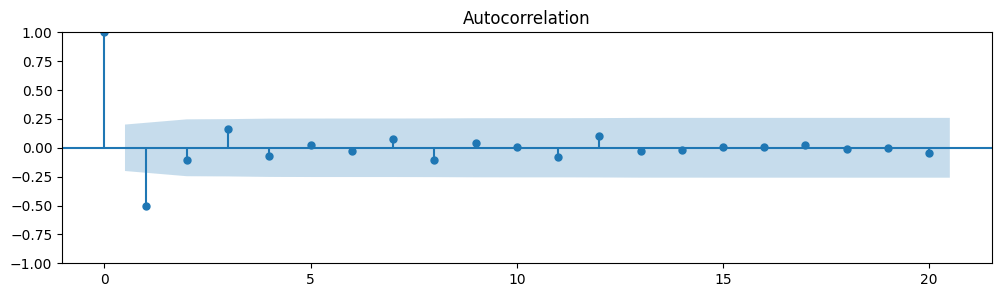

Descriptivo Residuos

count    95.000000
mean     -0.415791
std       6.811565
min     -23.379036
25%      -3.379065
50%      -0.379066
75%       2.620935
max      19.763190
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 3.569033036144094e-08

Shapiro
p-valor: 6.79192817187868e-05



In [286]:
evaluar_metricas(test[serie][:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

**TAD**

MSE: 43.00170058768184
MAE: 4.5179677183383244
RMSE: 6.557568191615077
MAPE: inf
Evaluacion de residuos de Serie 


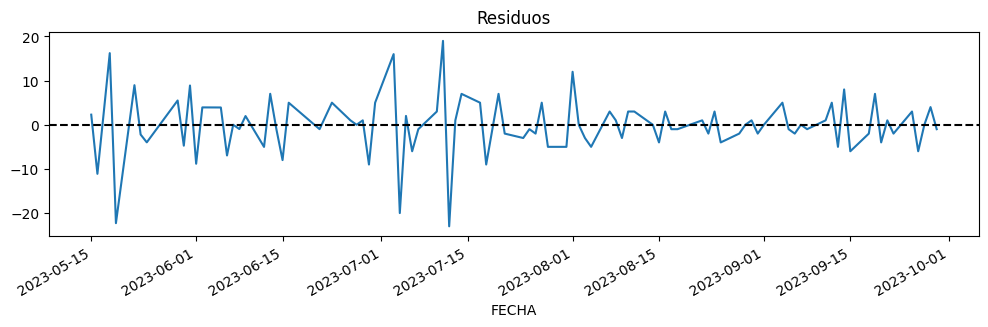

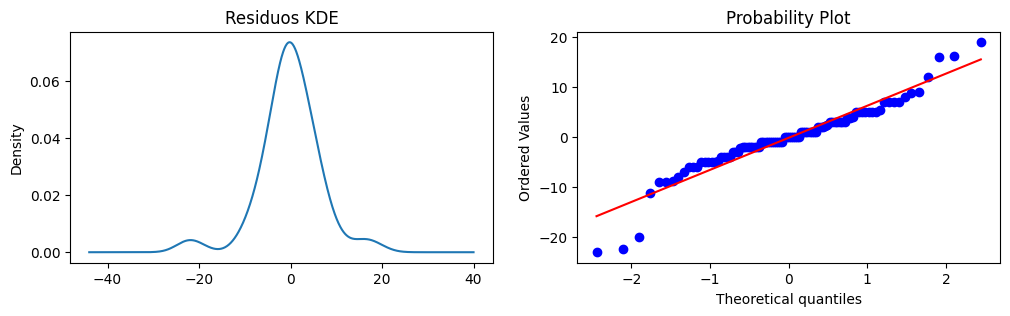

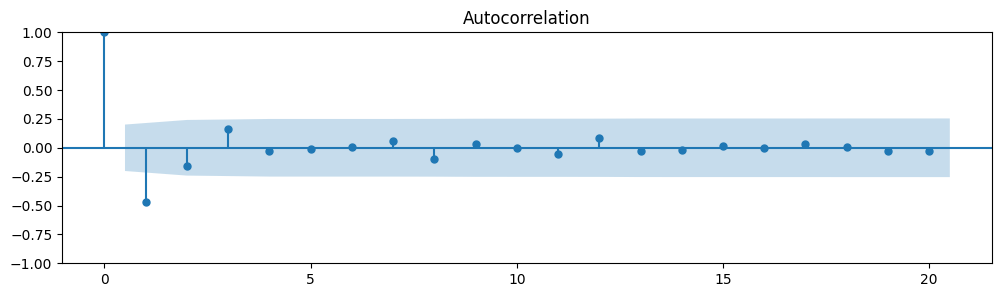

Descriptivo Residuos

count    95.000000
mean     -0.113083
std       6.591376
min     -22.997615
25%      -2.997676
50%       0.002324
75%       3.002324
max      19.002314
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 2.7260299032443144e-09

Shapiro
p-valor: 5.162860543350689e-05



In [287]:
evaluar_metricas(test[serie][:futuro], df[2].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

**PP**

MSE: 46.75920041461102
MAE: 4.675215252971493
RMSE: 6.838069933439627
MAPE: inf
Evaluacion de residuos de Serie 


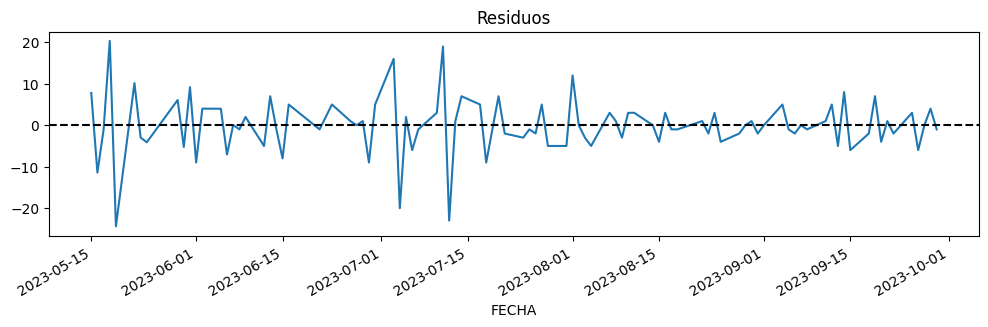

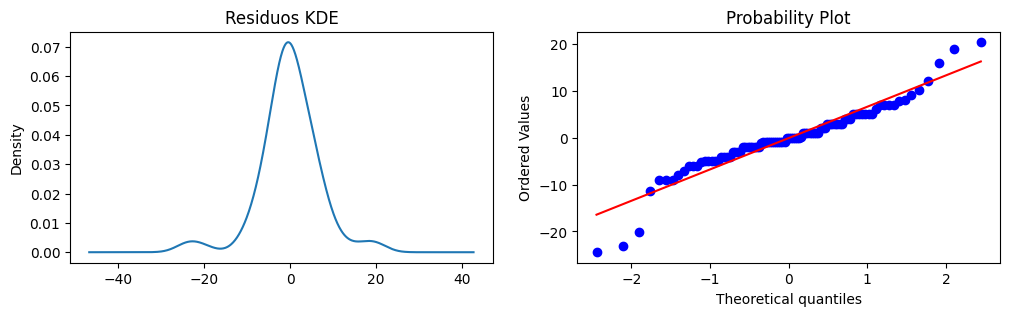

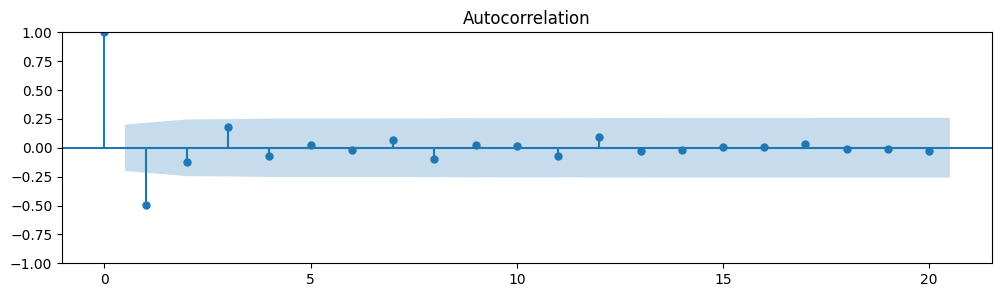

Descriptivo Residuos

count    95.000000
mean     -0.103181
std       6.873564
min     -24.415726
25%      -3.033611
50%      -0.033610
75%       2.966390
max      20.314590
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 8.496243010103268e-10

Shapiro
p-valor: 3.70813395420555e-05



In [288]:
evaluar_metricas(test[serie][:futuro], df[3].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[3].iloc[:,0])

---
### **11. Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis.**

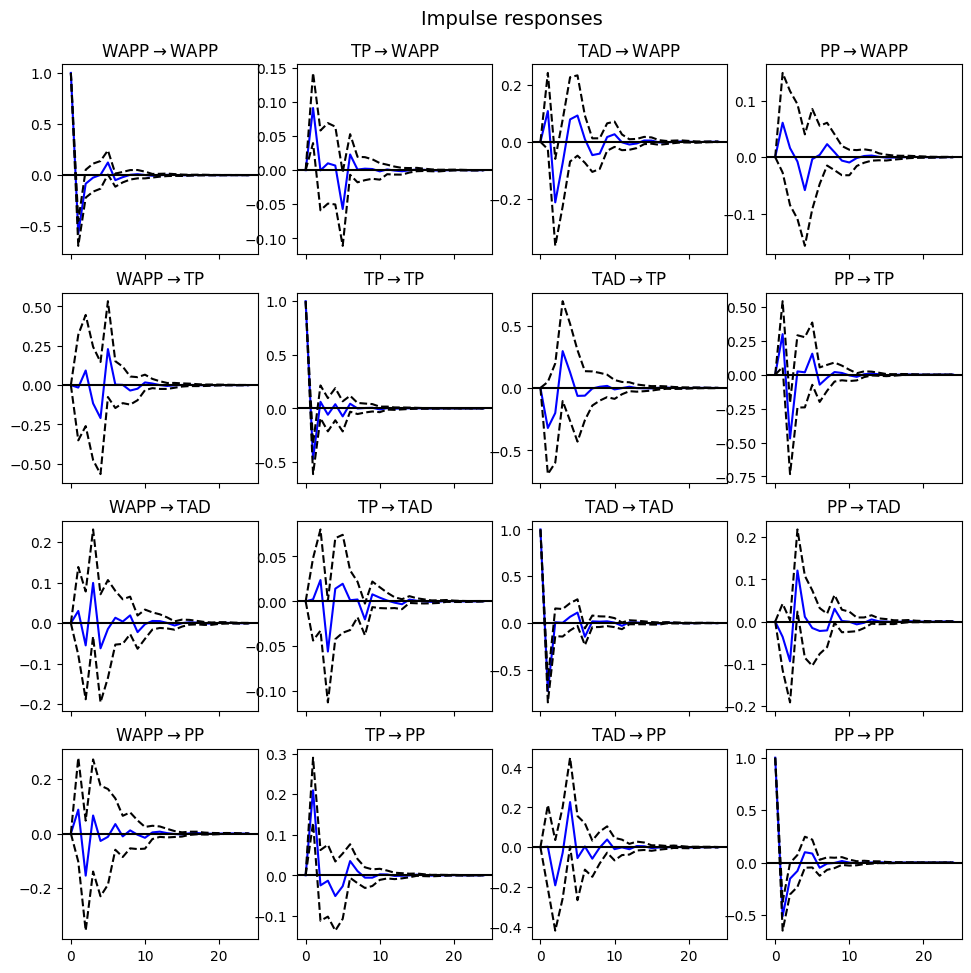

In [289]:
model_fitted.irf(24).plot();

---
### **12. En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. (Opcional) Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.**

In [290]:
# Las series no presentan estacionalidad